# Business Case: No-Churn Telecom 

## Loading dataset from Server

In [178]:
# #installing mysql and its connector
# !pip install pymysql
# !pip install mysql-connector


In [179]:
#importing some librarys
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mysql.connector import cursor
import warnings
warnings.filterwarnings("ignore")

In [180]:
#making connection to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&')

In [181]:
#printing databases 
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_telecom',)


In [182]:
#Reconnecting to database server 
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&',
                                  database='project_telecom')

In [183]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_telecom
0        telecom_churn_data


In [184]:
#taking datafrom a database
query='select * from telecom_churn_data'
df=pd.read_sql(query,connection)

In [185]:
#it's have a 21 columns and 4617 rows
df.shape

(4617, 21)

In [186]:

pd.set_option('display.max_columns',22)
# pd.set_option('display.max_rows',4617)

In [187]:

df.tail()

columns1 columns2 columns3   columns4 columns5 columns6 columns7  \
4612       NY       57      510   345-7512       no      yes       25   
4613       NM      177      408   343-6820       no      yes       29   
4614       VT       67      408   338-4794       no      yes       33   
4615       MI       98      415   355-8388       no      yes       23   
4616       IN      140      415   409-6884       no       no        0   

     columns8 columns9 columns10 columns11 columns12 columns13 columns14  \
4612      144       81     24.48     187.2       112     15.91     158.6   
4613      189       91     32.13     303.1        96     25.76     163.6   
4614    127.5      126     21.68     296.1       129     25.17     200.9   
4615    168.9       98     28.71     226.3       117     19.24     165.5   
4616    204.7      100      34.8     126.8       107     10.78     202.8   

     columns15 columns16 columns17 columns18 columns19 columns20 columns21  
4612       122      7.14       8.5         6       2.3         3    False.  
4613       116      7.36      15.7         1      4.24         3    False.  
4614        91      9.04        13         3      3.51         1    False.  
4615        96      7.45      14.3         3      3.86         0    False.  
4616       115      9.13      12.1         4      3.27         2    False.

In [188]:
#checking its information 
#in the dataset ther is no nun_null values and the all datatype is Object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   columns1   4617 non-null   object
 1   columns2   4617 non-null   object
 2   columns3   4617 non-null   object
 3   columns4   4617 non-null   object
 4   columns5   4617 non-null   object
 5   columns6   4617 non-null   object
 6   columns7   4617 non-null   object
 7   columns8   4617 non-null   object
 8   columns9   4617 non-null   object
 9   columns10  4617 non-null   object
 10  columns11  4617 non-null   object
 11  columns12  4617 non-null   object
 12  columns13  4617 non-null   object
 13  columns14  4617 non-null   object
 14  columns15  4617 non-null   object
 15  columns16  4617 non-null   object
 16  columns17  4617 non-null   object
 17  columns18  4617 non-null   object
 18  columns19  4617 non-null   object
 19  columns20  4617 non-null   object
 20  columns21  4617 non-null   obj

In [189]:
#renaming columns in dataset 
df.columns=(["State",'Account_Length','Area_Code','Phone','International_Plan','VMail_Plan','VMail_Message',\
           'Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins',"Night_calls",\
            'Night_Charge','International_Mins','International_Calls','International_Charge','CustServ_Calls','Churn'])

In [190]:
df.head()

State Account_Length Area_Code      Phone International_Plan VMail_Plan  \
0    KS            128       415   382-4657                 no        yes   
1    OH            107       415   371-7191                 no        yes   
2    NJ            137       415   358-1921                 no         no   
3    OH             84       408   375-9999                yes         no   
4    OK             75       415   330-6626                yes         no   

  VMail_Message Day_Mins Day_Calls Day_Charge Eve_Mins Eve_Calls Eve_Charge  \
0            25    265.1       110      45.07    197.4        99      16.78   
1            26    161.6       123      27.47    195.5       103      16.62   
2             0    243.4       114      41.38    121.2       110       10.3   
3             0    299.4        71       50.9     61.9        88       5.26   
4             0    166.7       113      28.34    148.3       122      12.61   

  Night_Mins Night_calls Night_Charge International_Mins International_Calls  \
0      244.7          91        11.01                 10                   3   
1      254.4         103        11.45               13.7                   3   
2      162.6         104         7.32               12.2                   5   
3      196.9          89         8.86                6.6                   7   
4      186.9         121         8.41               10.1                   3   

  International_Charge CustServ_Calls    Churn  
0                  2.7              1   False.  
1                  3.7              1   False.  
2                 3.29              0   False.  
3                 1.78              2   False.  
4                 2.73              3   False.

In [191]:
#copying data to df1
df1=df.copy()

In [192]:
df1.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_calls',
       'Night_Charge', 'International_Mins', 'International_Calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [193]:
#convering Numerical data types
#Converting object data into integers
df1=df1.astype({"Area_Code":'int64',
                "Account_Length":'int64',
                'VMail_Message':'int64',
                'Day_Calls':'int64',
                'Eve_Calls':'int64',
                'Night_calls':'int64',
                'International_Calls':'int64',
                'CustServ_Calls':'int64'})

#converting object data into floting
df1=df1.astype({'Day_Mins':'float64', 
                'Day_Charge':'float64',
                'Eve_Mins':'float64',
                'Eve_Charge':'float64',
                'Night_Mins':'float64',
                'Night_Charge':'float64',
                'International_Charge':'float64',
                'International_Mins':'float64'})

In [194]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_calls           4617 non-null   int64  
 15  Night_Charge         

In [195]:
#checking for null values
df1.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_calls             0
Night_Charge            0
International_Mins      0
International_Calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

in above observation there is no null values

In [196]:
#checking num
df1.describe()

Account_Length    Area_Code  VMail_Message     Day_Mins    Day_Calls  \
count     4617.000000  4617.000000    4617.000000  4617.000000  4617.000000   
mean       100.645224   437.046350       7.849903   180.447152   100.054364   
std         39.597194    42.288212      13.592333    53.983540    19.883027   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        100.000000   415.000000       0.000000   180.000000   100.000000   
75%        127.000000   510.000000      17.000000   216.800000   113.000000   
max        243.000000   510.000000      51.000000   351.500000   165.000000   

        Day_Charge     Eve_Mins    Eve_Calls   Eve_Charge   Night_Mins  \
count  4617.000000  4617.000000  4617.000000  4617.000000  4617.000000   
mean     30.676576   200.429088   100.179770    17.036703   200.623933   
std       9.177145    50.557001    19.821314     4.297332    50.543616   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   165.900000    87.000000    14.100000   167.100000   
50%      30.600000   200.800000   101.000000    17.070000   200.800000   
75%      36.860000   234.000000   114.000000    19.890000   234.900000   
max      59.760000   363.700000   170.000000    30.910000   395.000000   

       Night_calls  Night_Charge  International_Mins  International_Calls  \
count  4617.000000   4617.000000         4617.000000          4617.000000   
mean     99.944120      9.028185           10.279294             4.433831   
std      19.935053      2.274488            2.757361             2.457615   
min      12.000000      1.040000            0.000000             0.000000   
25%      87.000000      7.520000            8.600000             3.000000   
50%     100.000000      9.040000           10.300000             4.000000   
75%     113.000000     10.570000           12.100000             6.000000   
max     175.000000     17.770000           20.000000            20.000000   

       International_Charge  CustServ_Calls  
count           4617.000000     4617.000000  
mean               2.775926        1.567035  
std                0.744413        1.307019  
min                0.000000        0.000000  
25%                2.320000        1.000000  
50%                2.780000        1.000000  
75%                3.270000        2.000000  
max                5.400000        9.000000

In [197]:
#no. unique values in each feature
df1.nunique()

State                     51
Account_Length           218
Area_Code                  3
Phone                   4617
International_Plan         2
VMail_Plan                 2
VMail_Message             47
Day_Mins                1901
Day_Calls                123
Day_Charge              1901
Eve_Mins                1833
Eve_Calls                125
Eve_Charge              1621
Night_Mins              1813
Night_calls              130
Night_Charge            1012
International_Mins       168
International_Calls       21
International_Charge     168
CustServ_Calls            10
Churn                      2
dtype: int64

In [198]:
#Checking for duplicate values
duplicate_values=df1.duplicated()
print(duplicate_values.sum())

0


In above observation There is no Duplicate values in Dataset

In [199]:
#churn have feature is two unique types and they are False and True
df1.Churn.unique()

array([' False.', ' True.'], dtype=object)

In [200]:
#Churn is target variable
df1.Churn.replace([' False.',' True.'],['No','Yes'],inplace=True)#changing False=No and True=Yes

In [201]:
#droping the Phone coulumn
df1.drop('Phone',axis=1,inplace=True)

In [202]:
df1.Churn.unique()

array(['No', 'Yes'], dtype=object)

## EDA

### Univariate Anlysis

In [203]:
#seperating categorical and numarical data for ploting 
categorical_data=df1[['State','Area_Code','International_Plan','VMail_Plan','Churn']]
numeric_data=df1[['Account_Length','VMail_Message','Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_calls','Night_Charge','International_Mins','International_Calls','International_Charge','CustServ_Calls']]

In [204]:
categorical_data.head(5)

State  Area_Code International_Plan VMail_Plan Churn
0    KS        415                 no        yes    No
1    OH        415                 no        yes    No
2    NJ        415                 no         no    No
3    OH        408                yes         no    No
4    OK        415                yes         no    No

In [205]:
numeric_data.head(5)

Account_Length  VMail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  \
0             128             25     265.1        110       45.07     197.4   
1             107             26     161.6        123       27.47     195.5   
2             137              0     243.4        114       41.38     121.2   
3              84              0     299.4         71       50.90      61.9   
4              75              0     166.7        113       28.34     148.3   

   Eve_Calls  Eve_Charge  Night_Mins  Night_calls  Night_Charge  \
0         99       16.78       244.7           91         11.01   
1        103       16.62       254.4          103         11.45   
2        110       10.30       162.6          104          7.32   
3         88        5.26       196.9           89          8.86   
4        122       12.61       186.9          121          8.41   

   International_Mins  International_Calls  International_Charge  \
0                10.0                    3                  2.70   
1                13.7                    3                  3.70   
2                12.2                    5                  3.29   
3                 6.6                    7                  1.78   
4                10.1                    3                  2.73   

   CustServ_Calls  
0               1  
1               1  
2               0  
3               2  
4               3

                                             |                                             | [  0%]   00:00 ->…


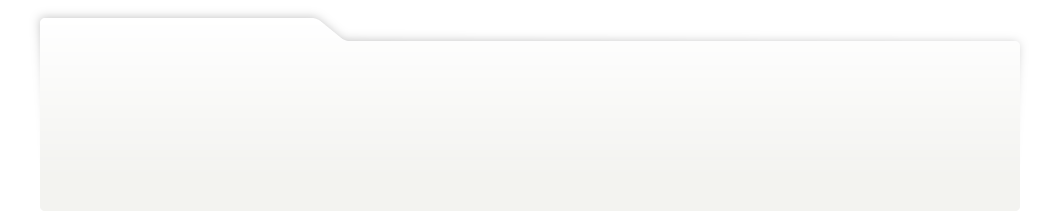
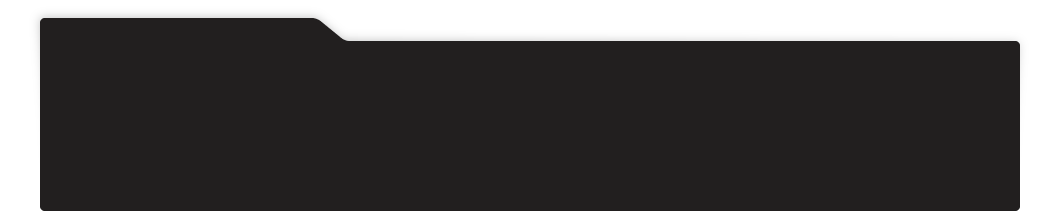
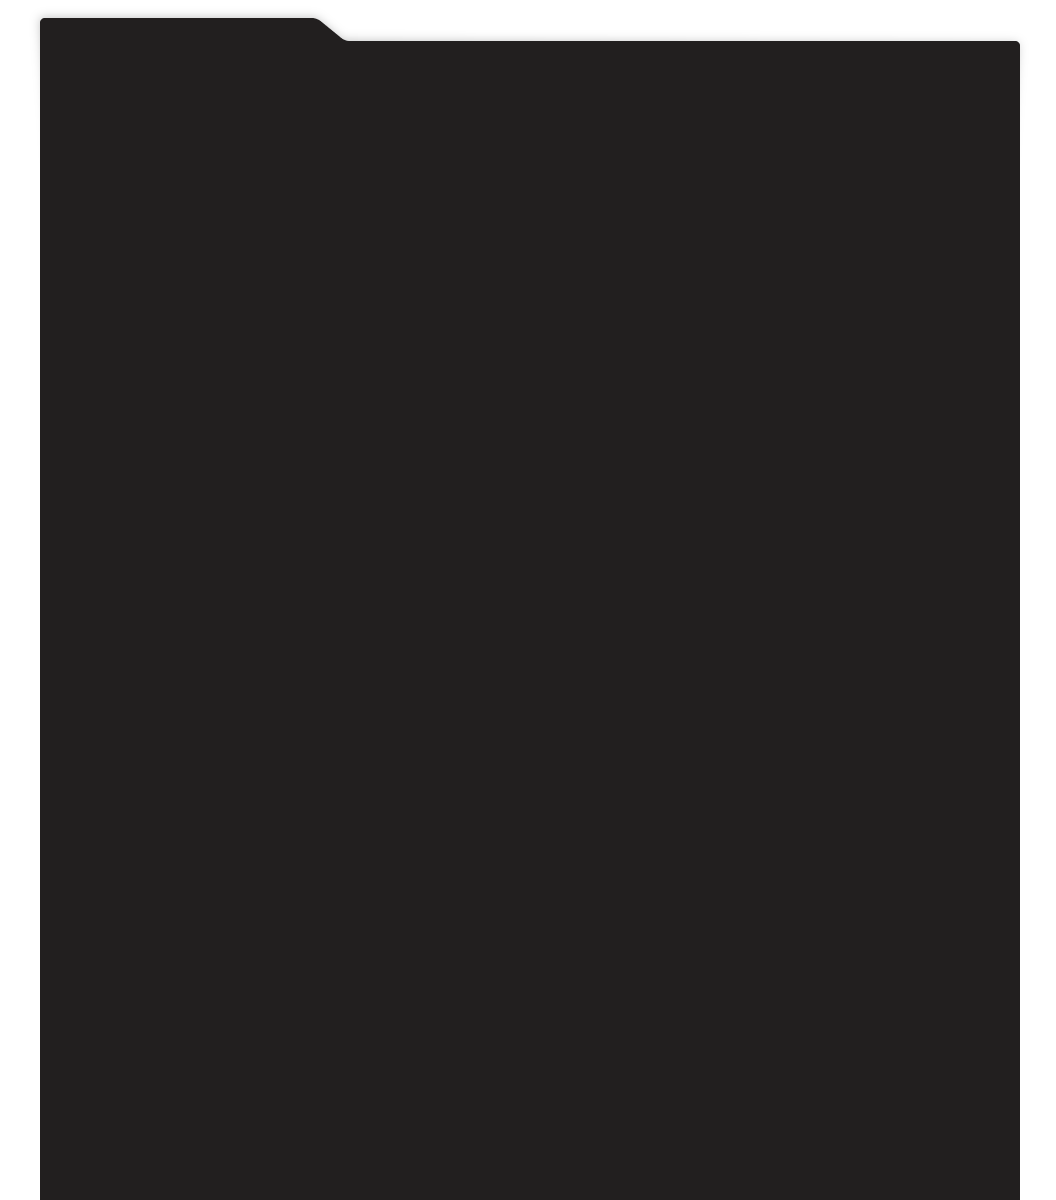
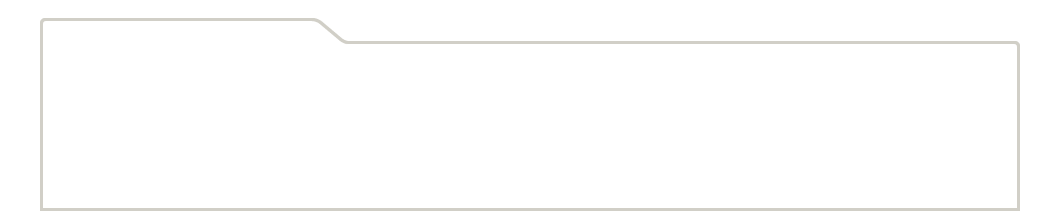
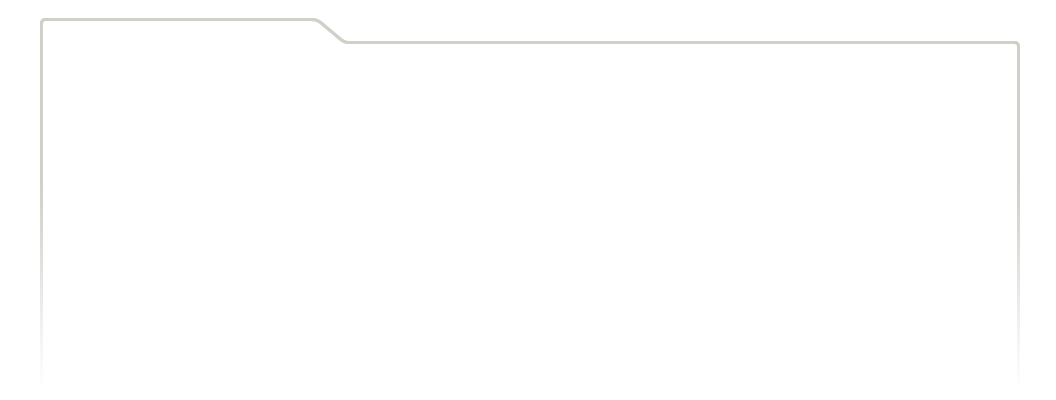
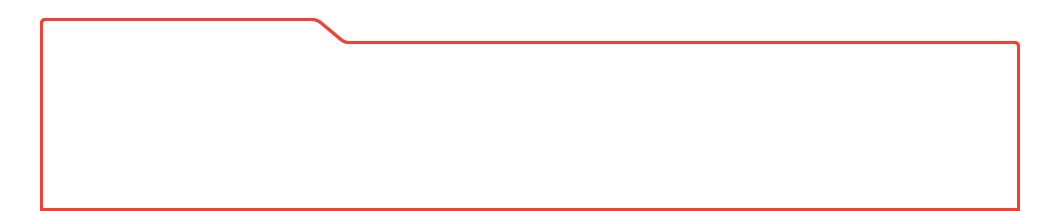
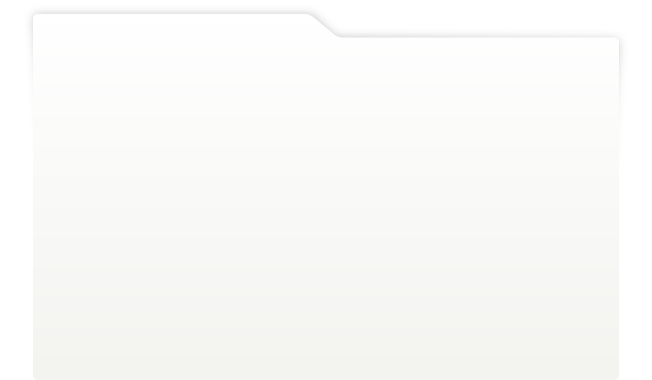
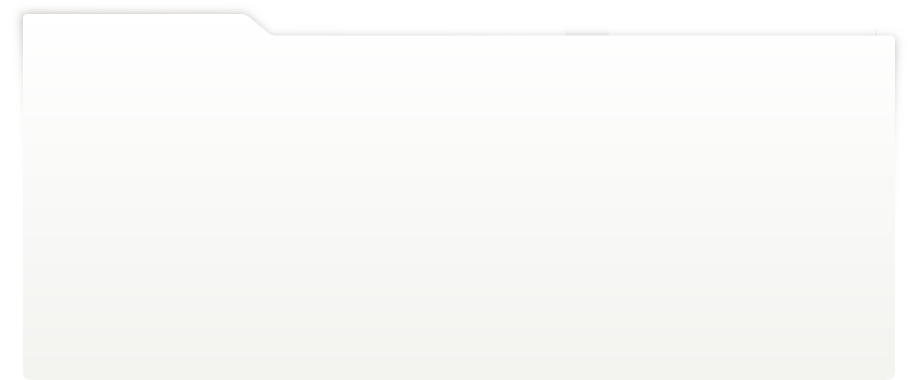
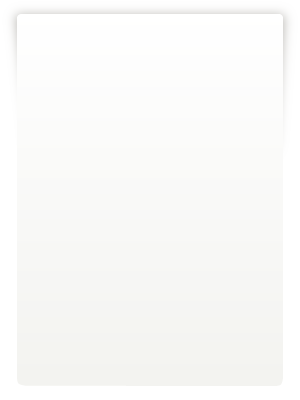
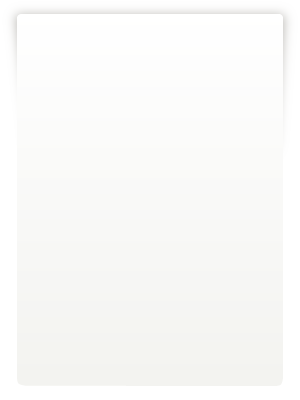
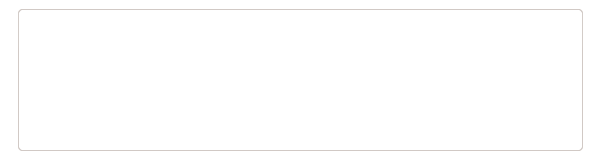
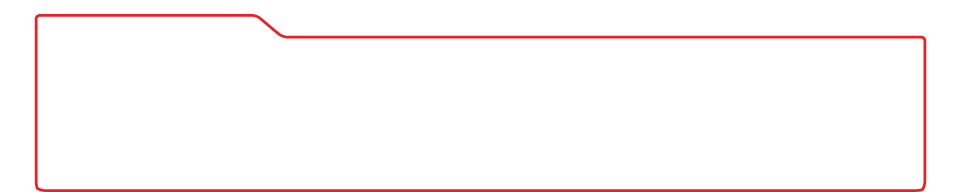
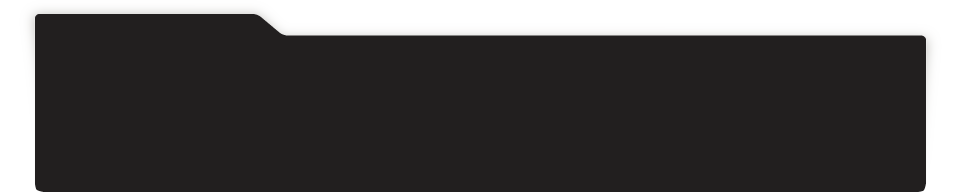
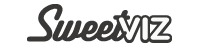
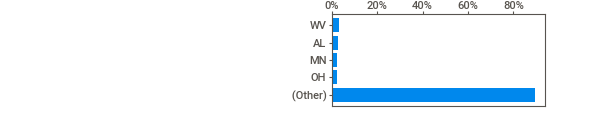
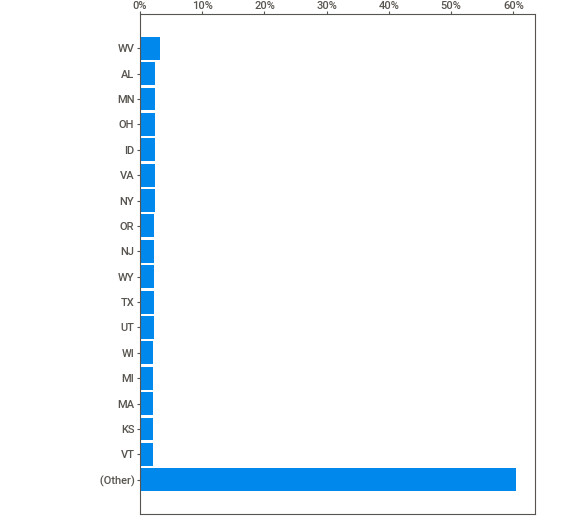
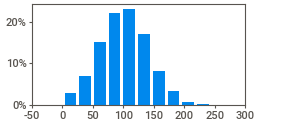
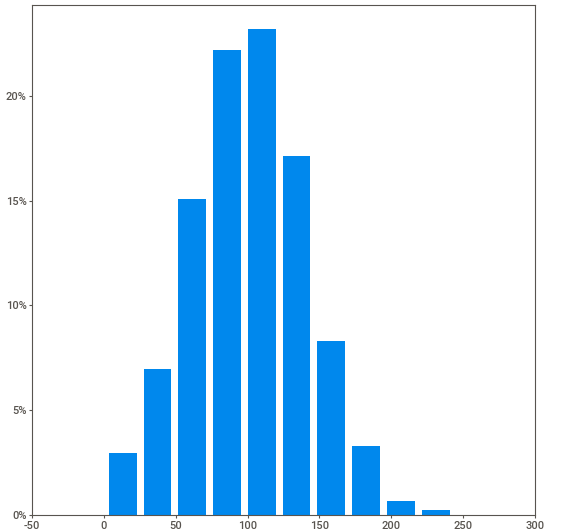
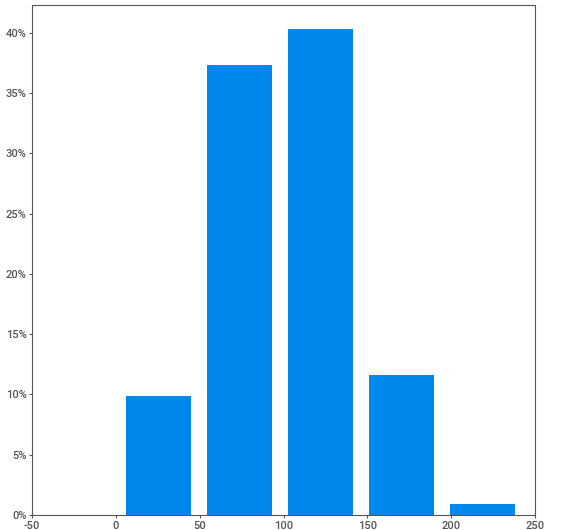
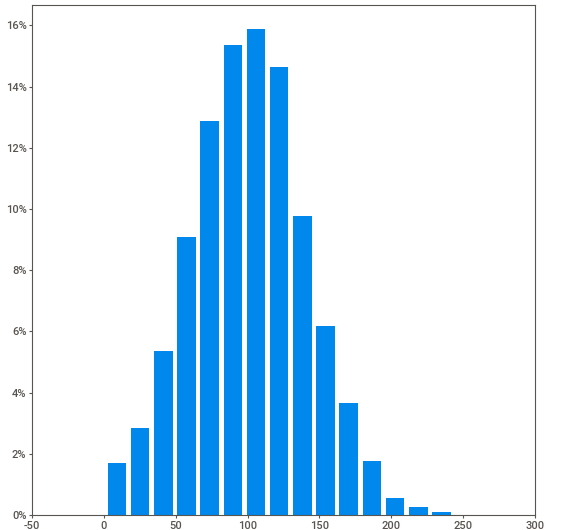
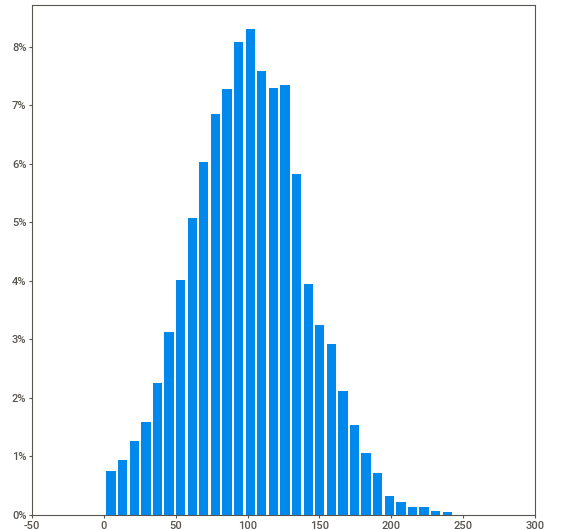
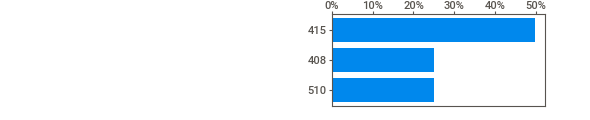
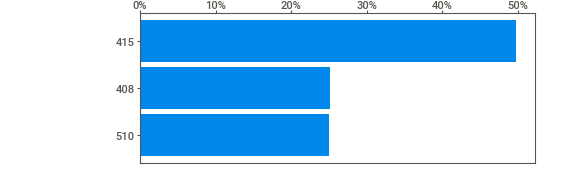
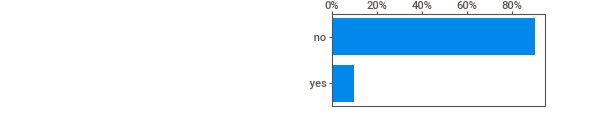
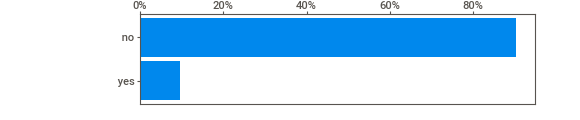
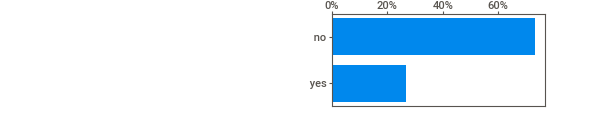
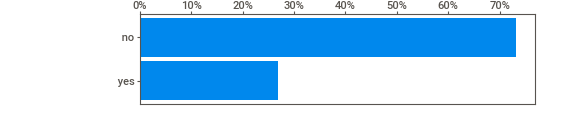
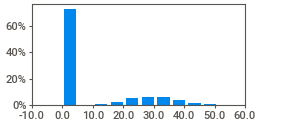
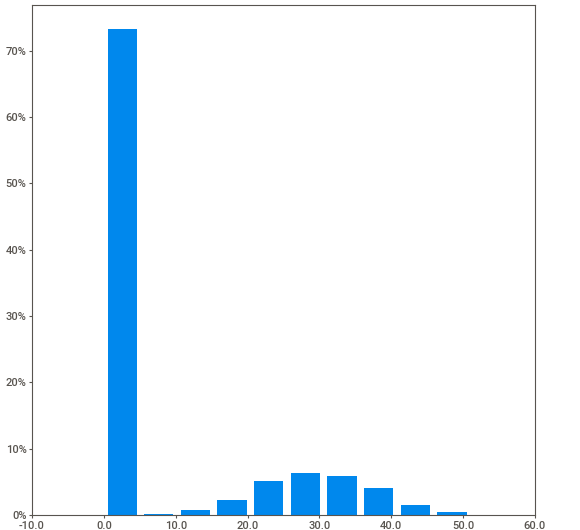
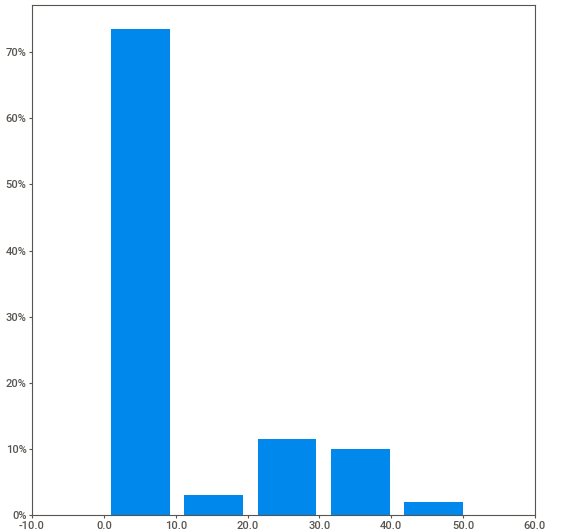
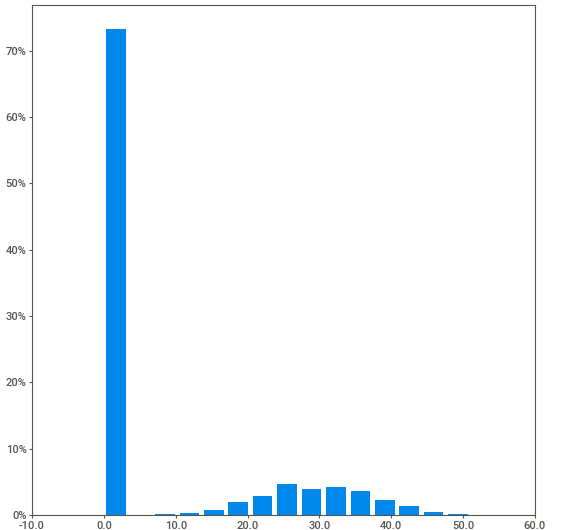
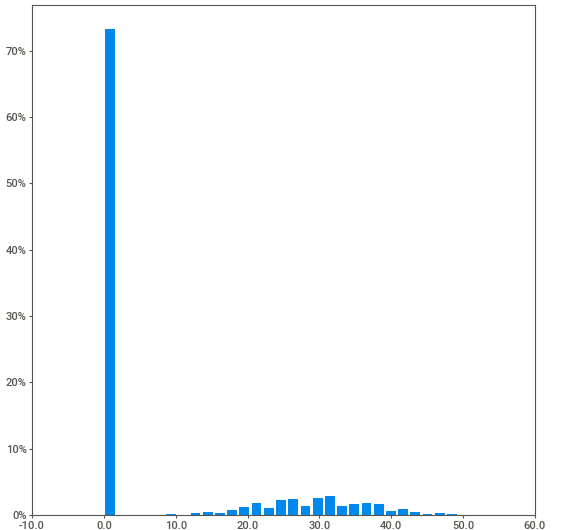
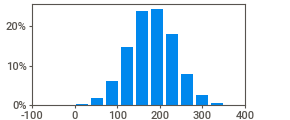
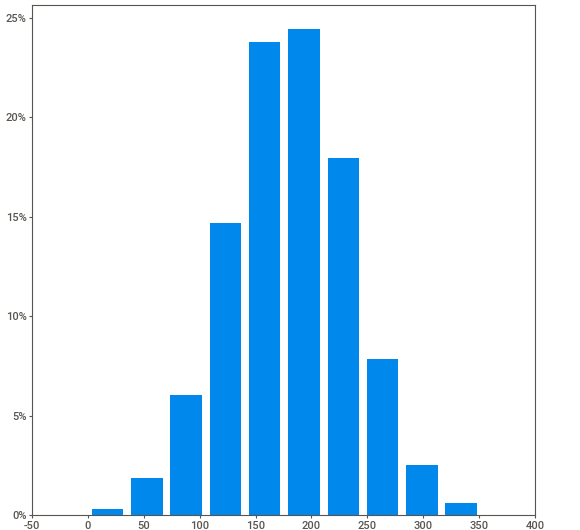
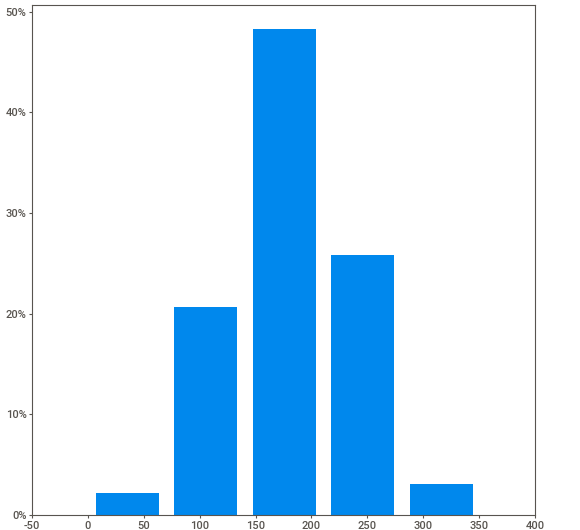
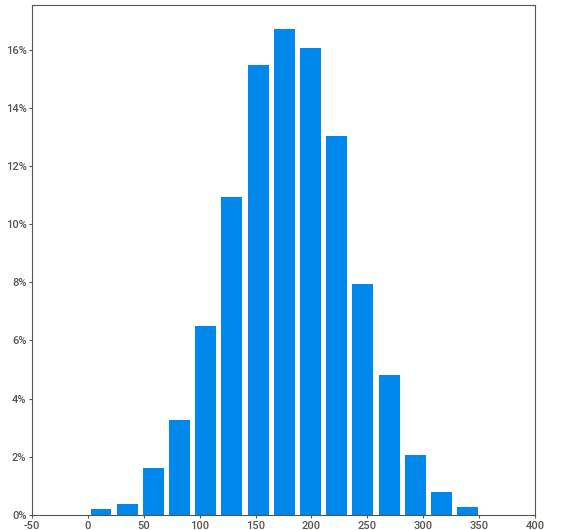
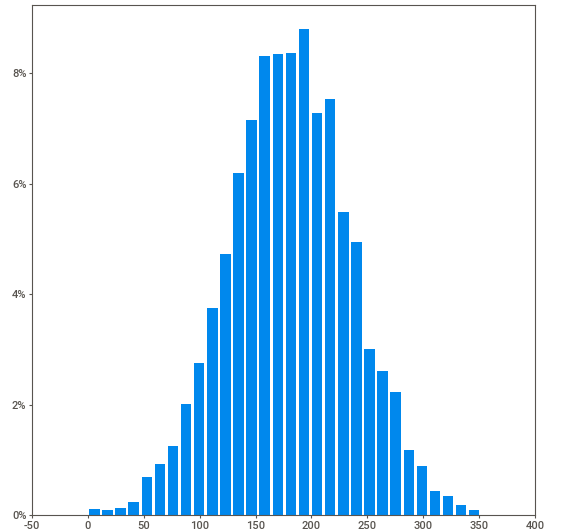
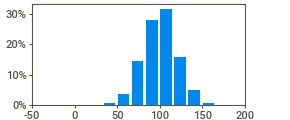
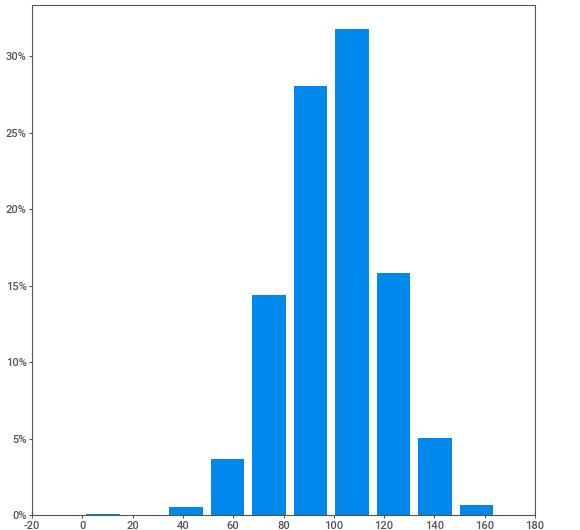
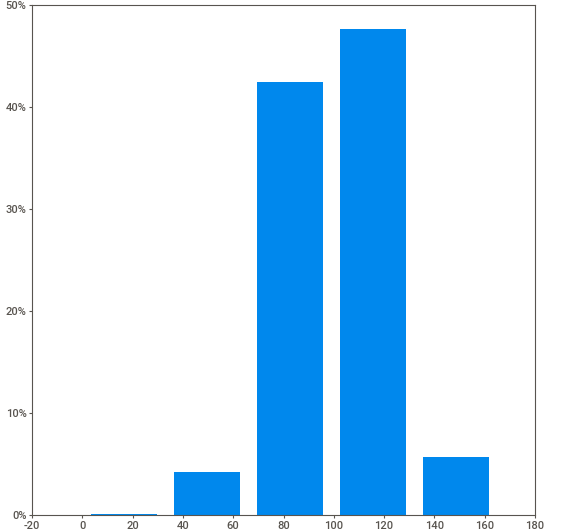
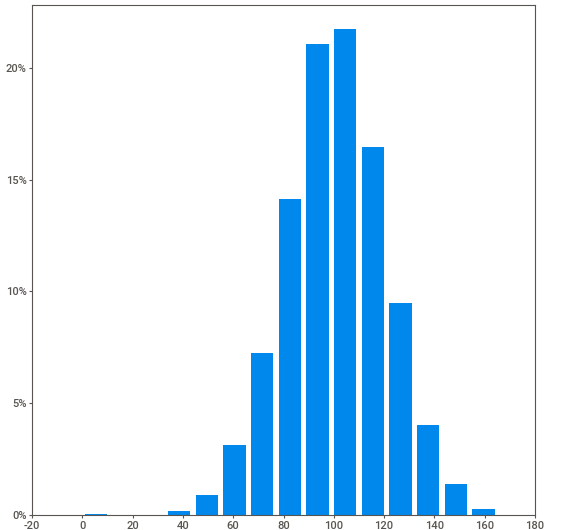
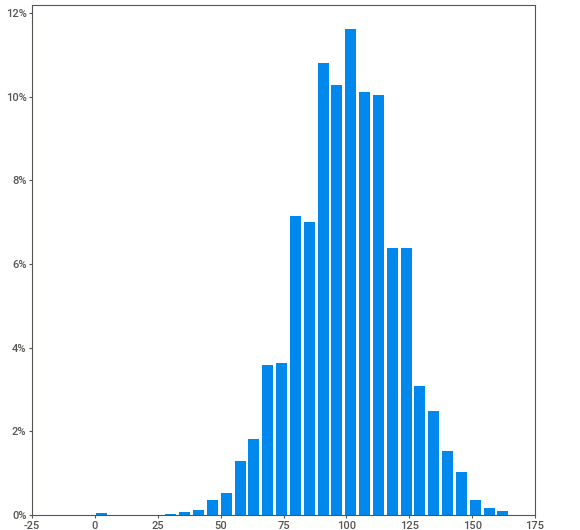
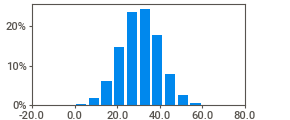
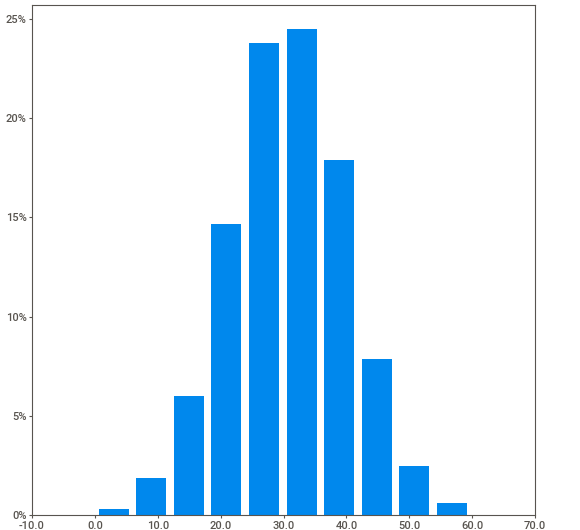
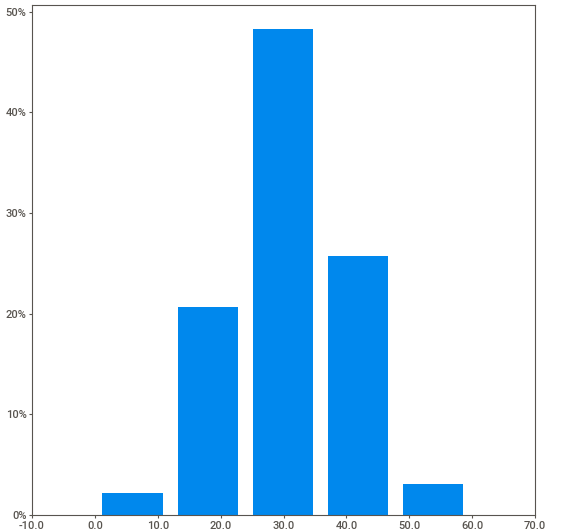
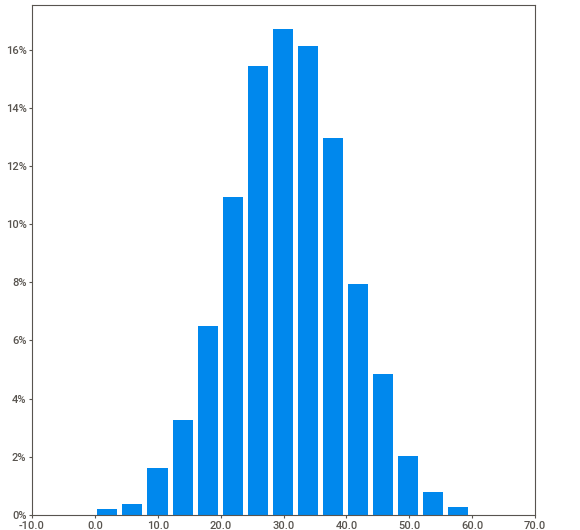
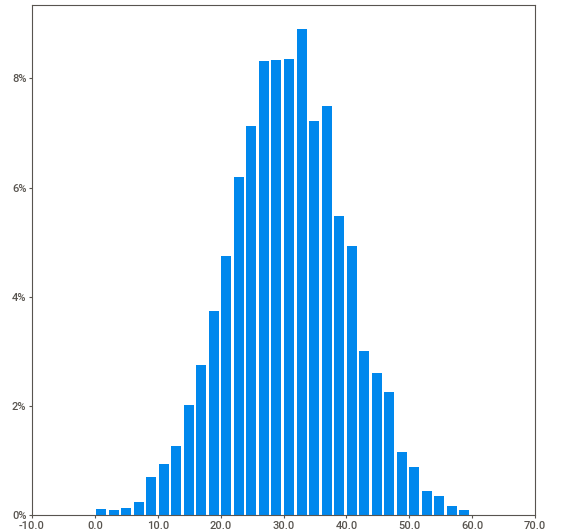
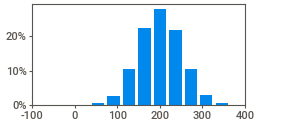
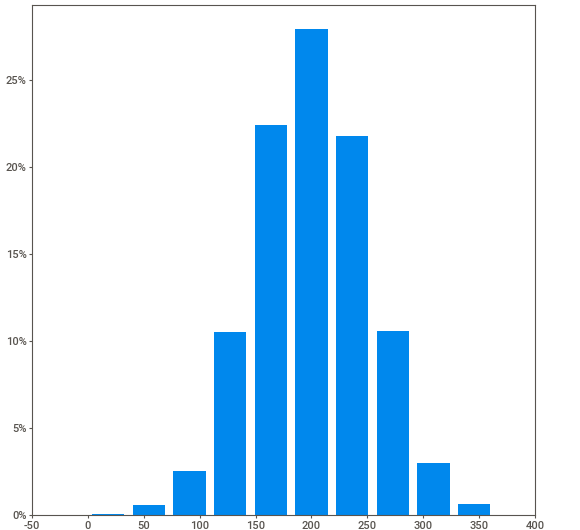
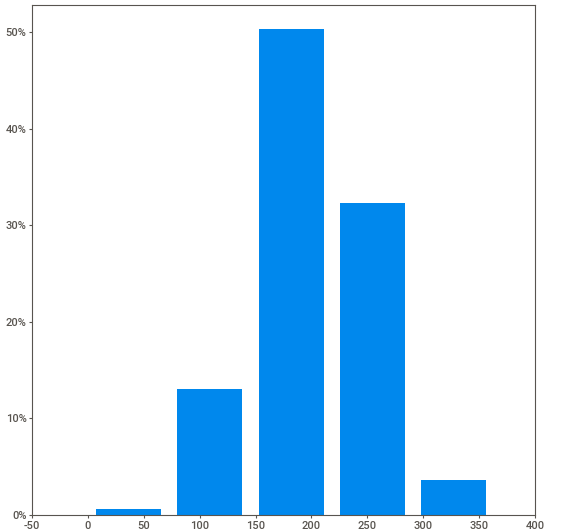
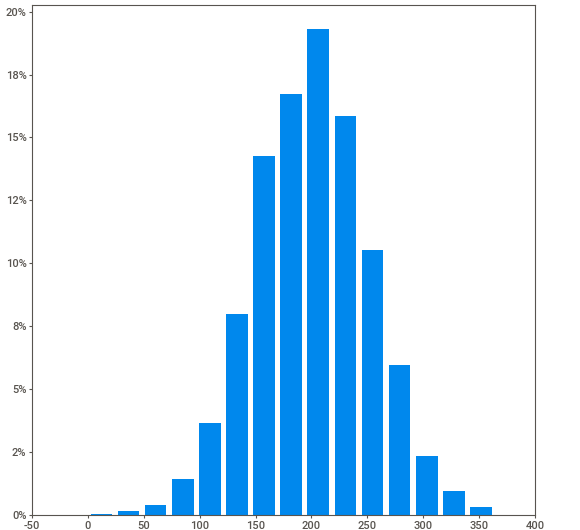
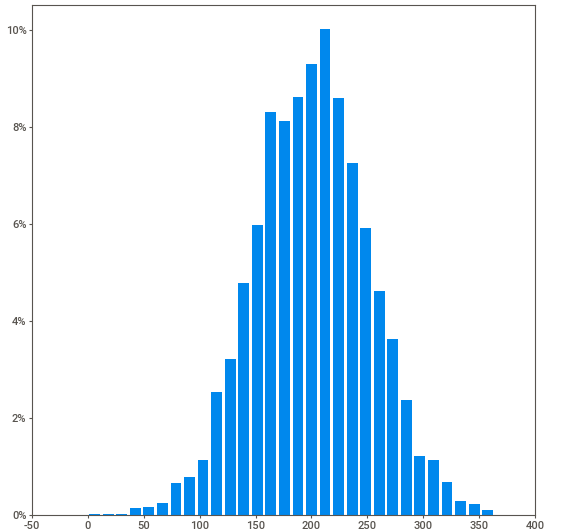
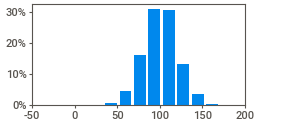
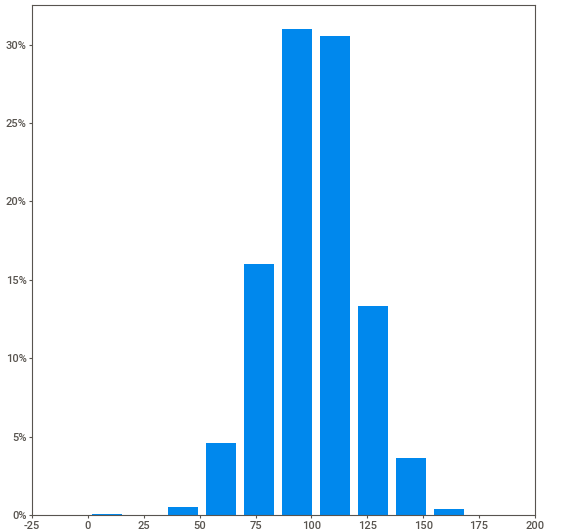
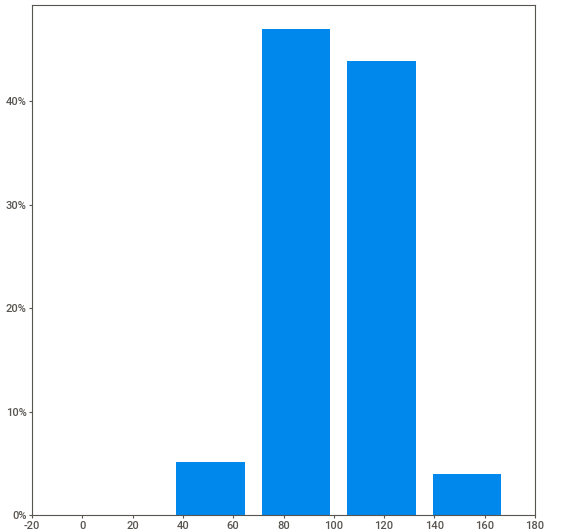
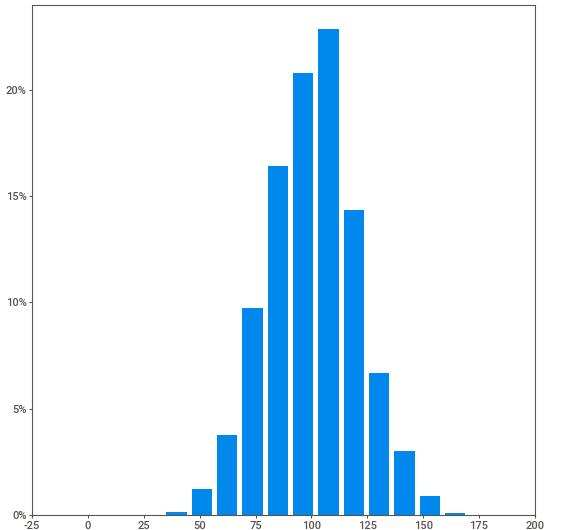
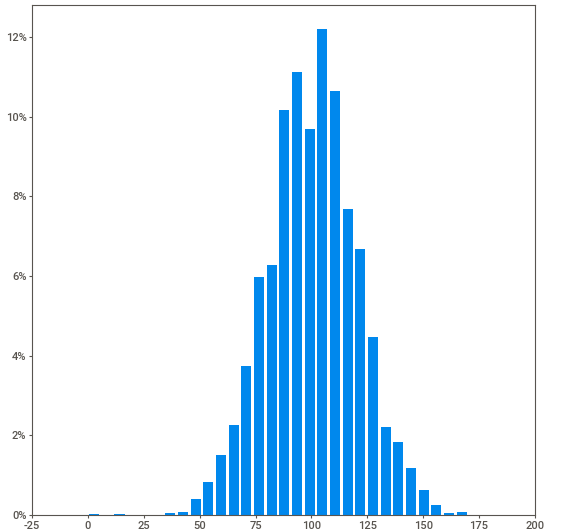
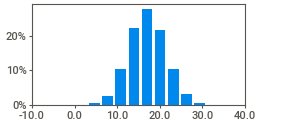
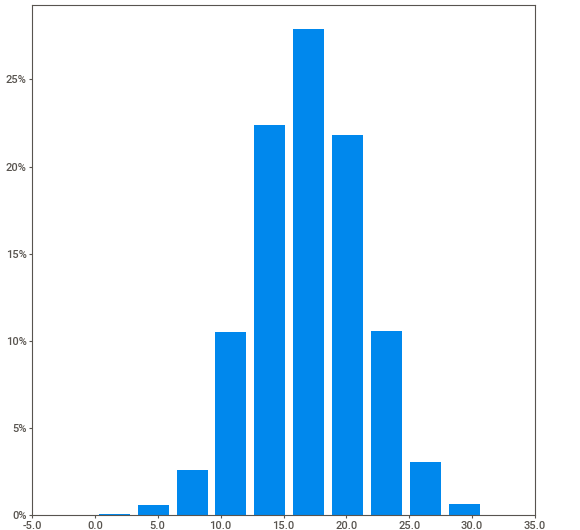
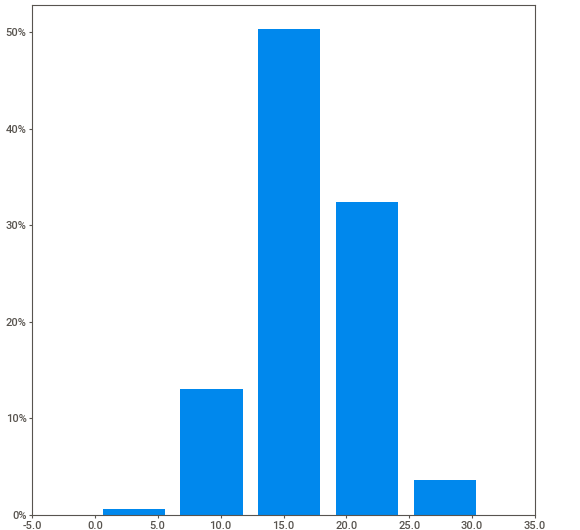
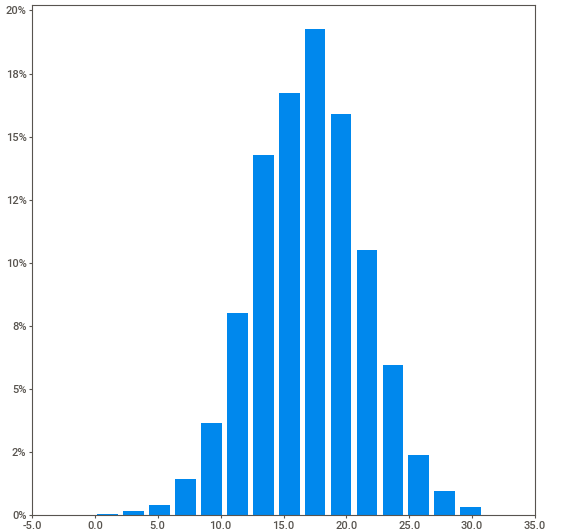
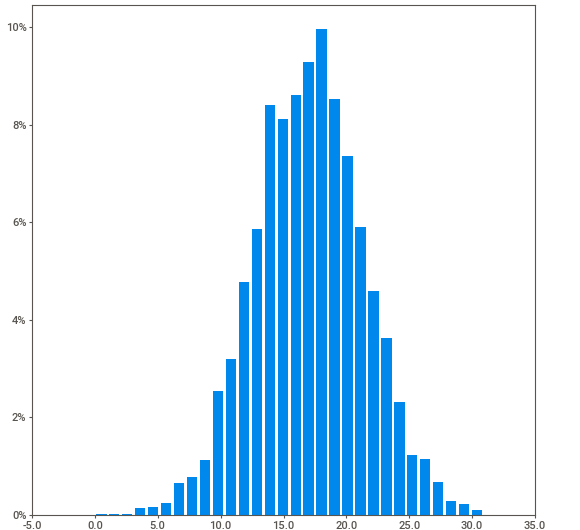
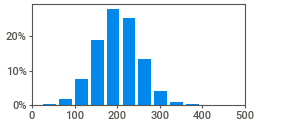
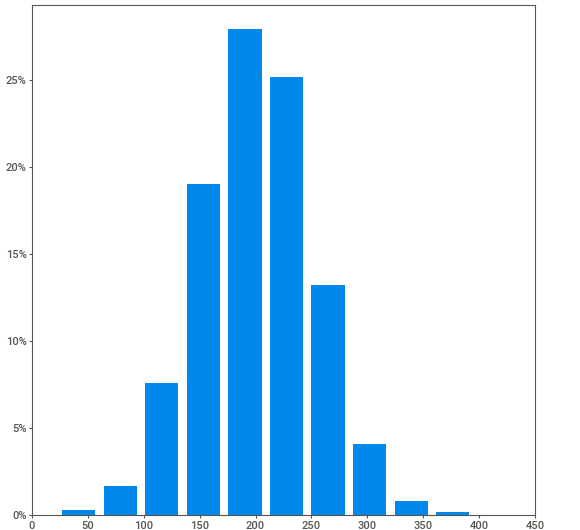
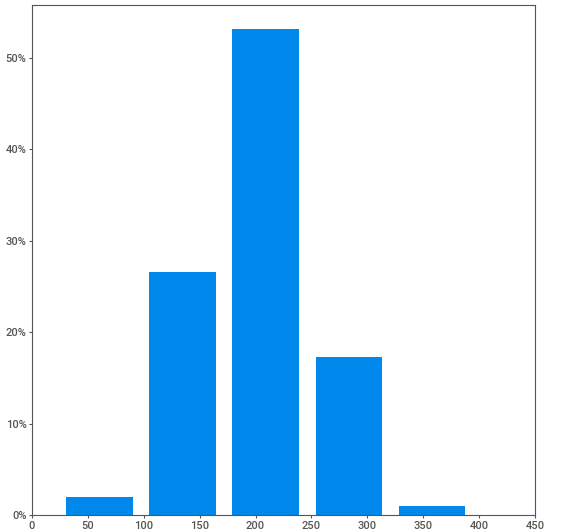
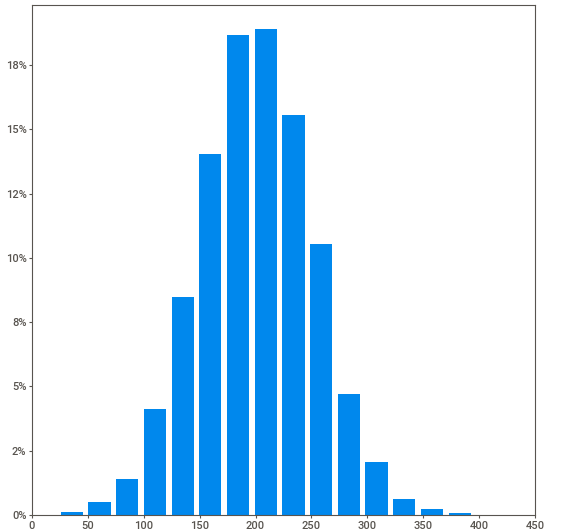
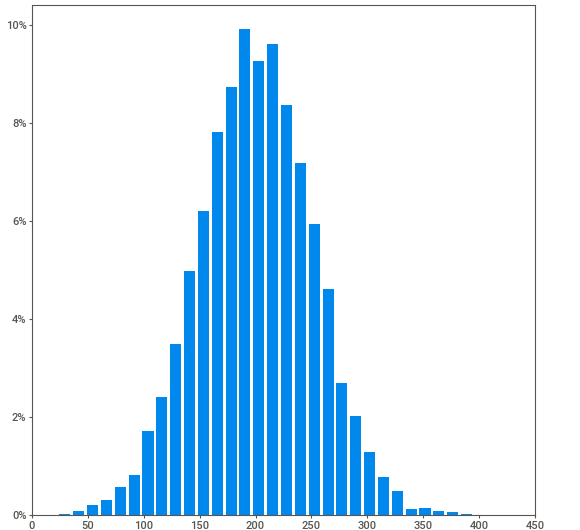
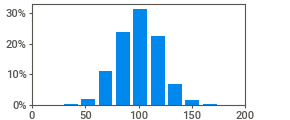
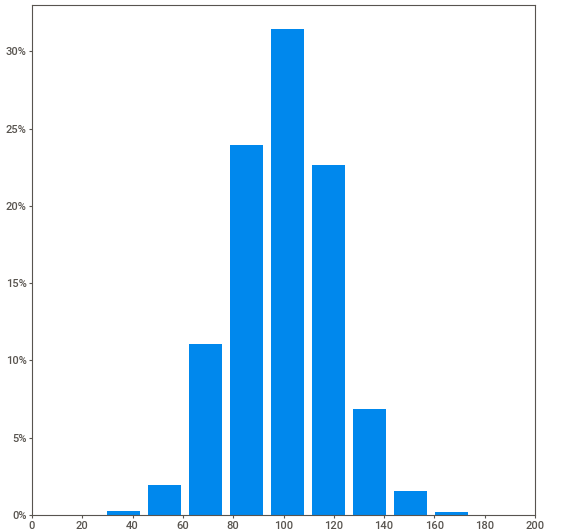
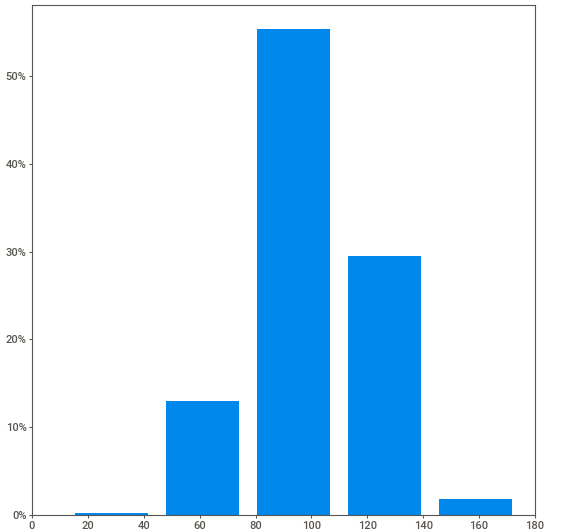
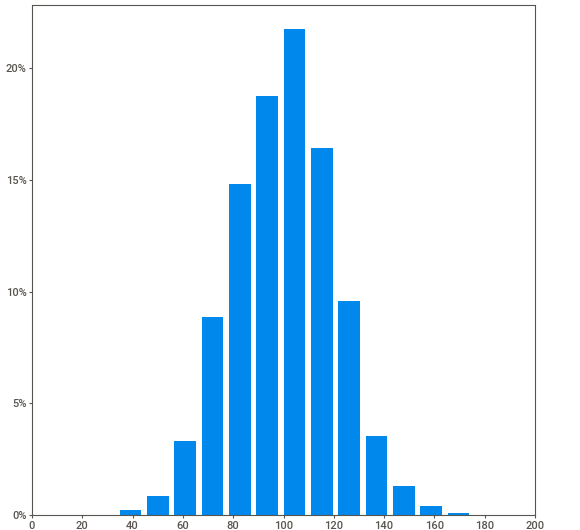
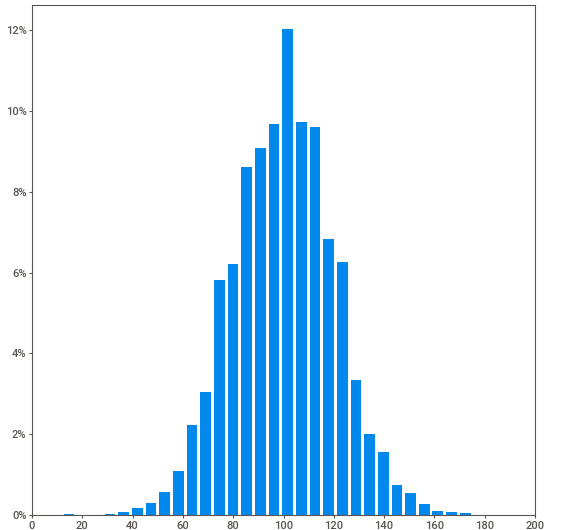
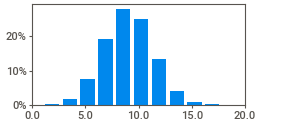
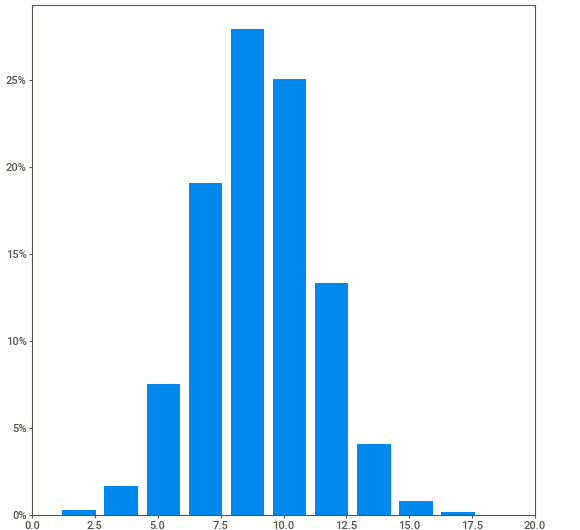
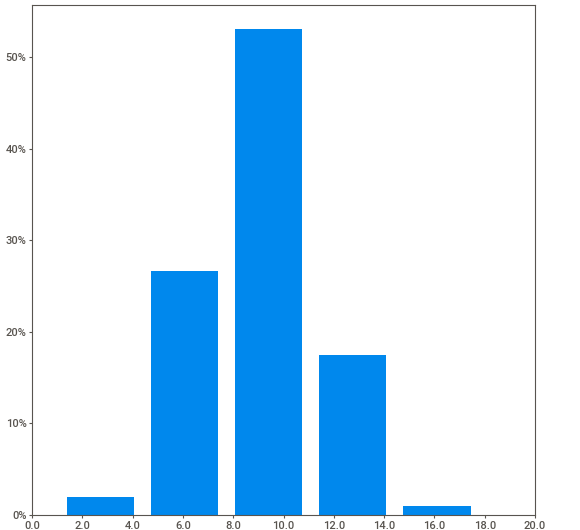
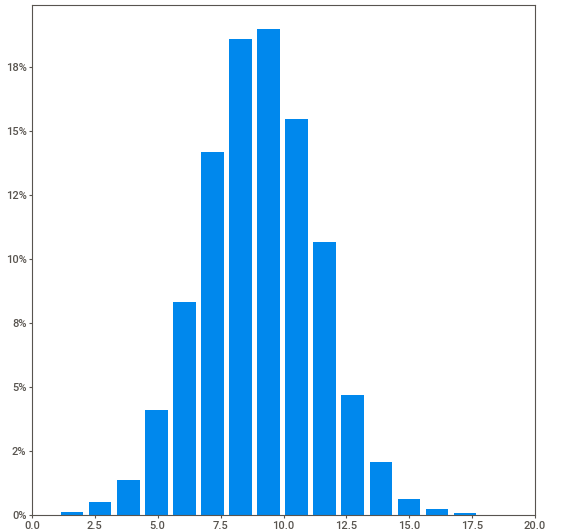
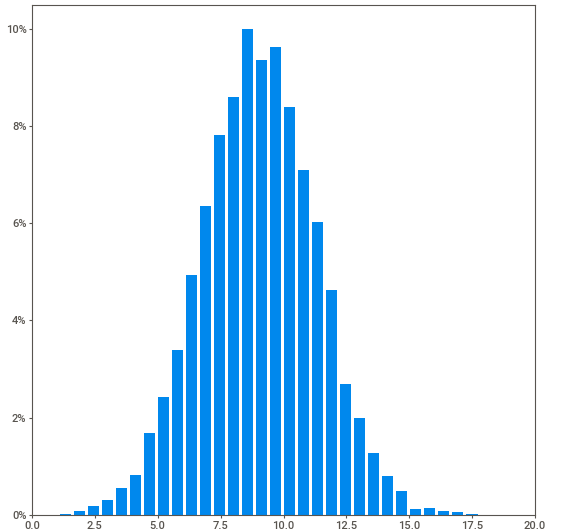
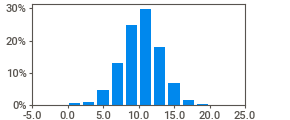
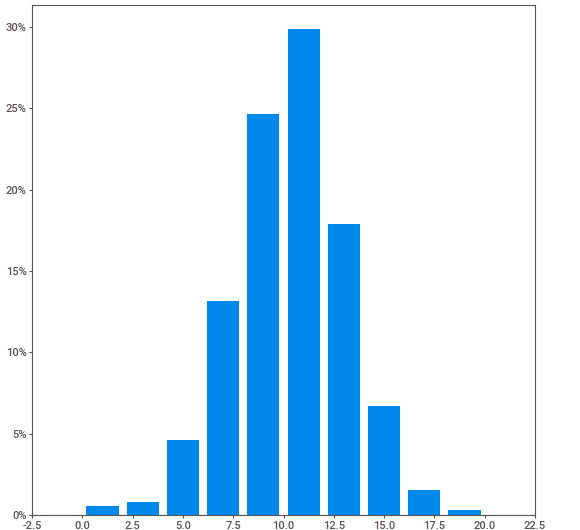
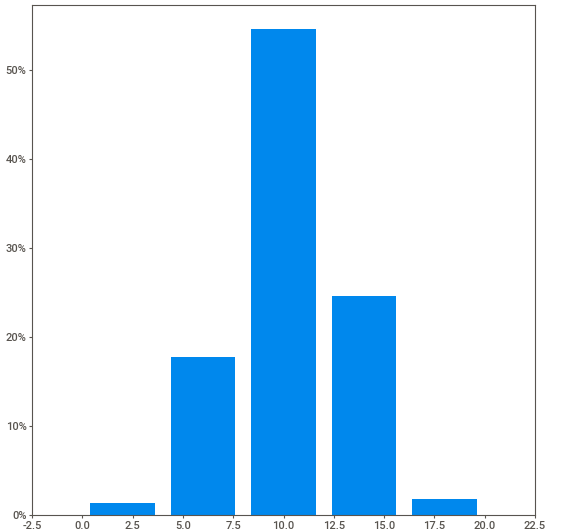
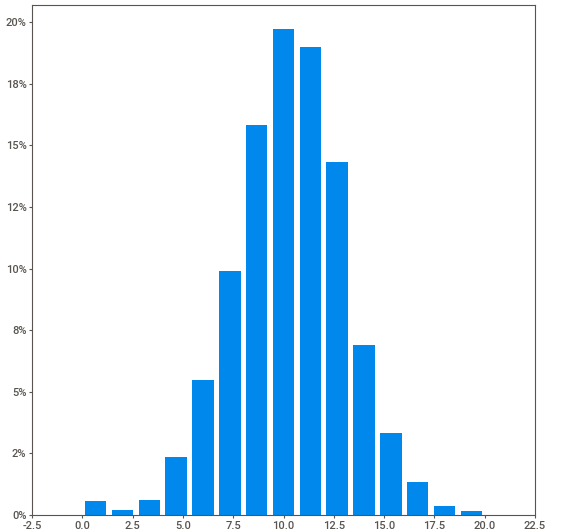
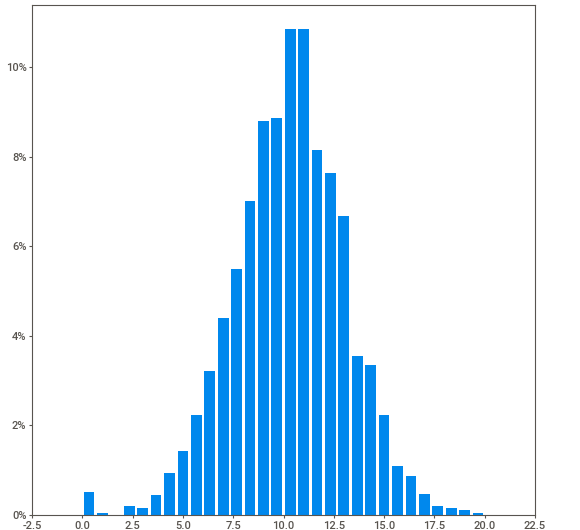
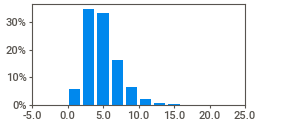
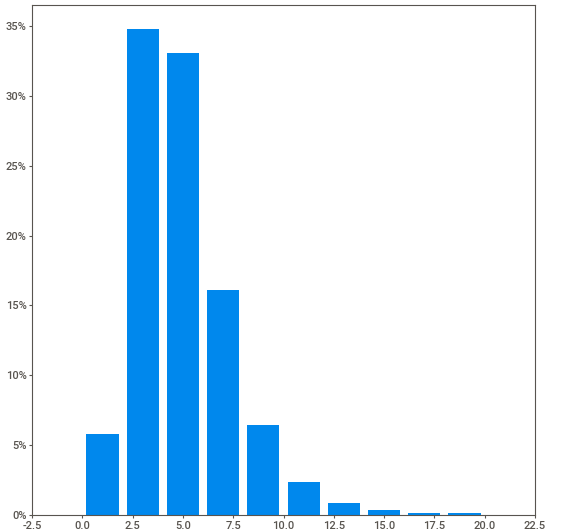
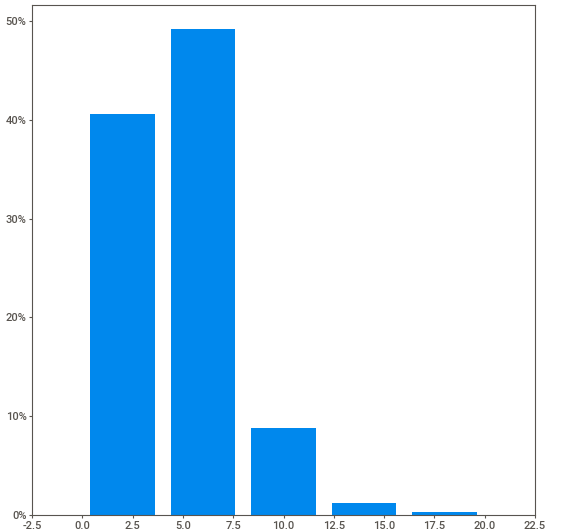
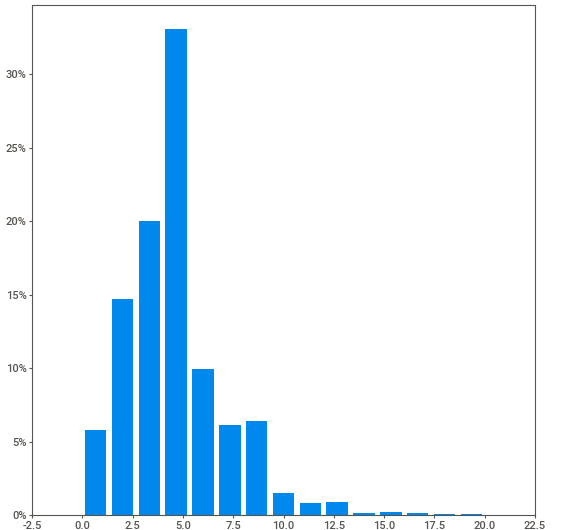
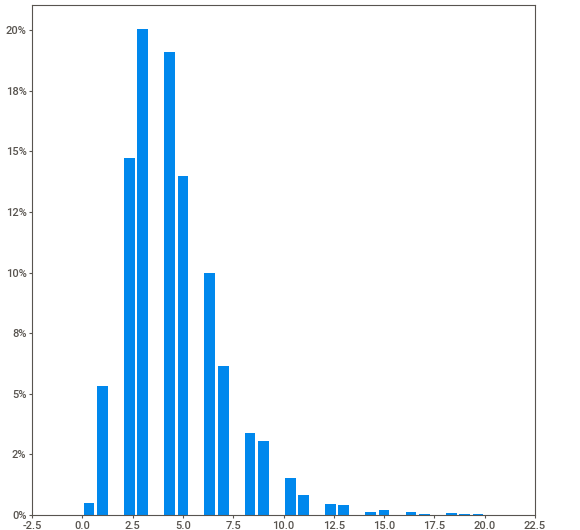
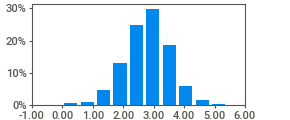
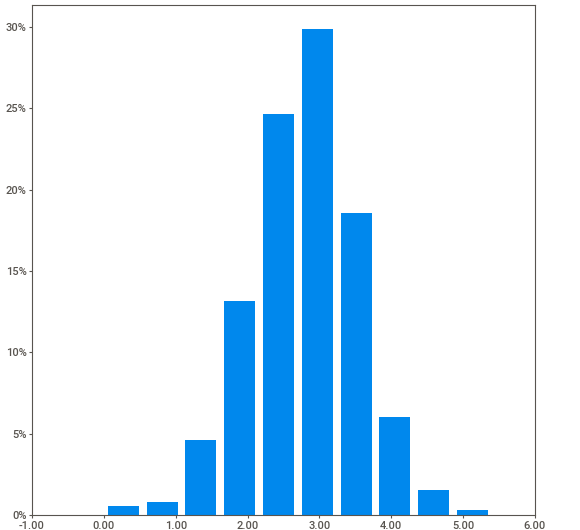
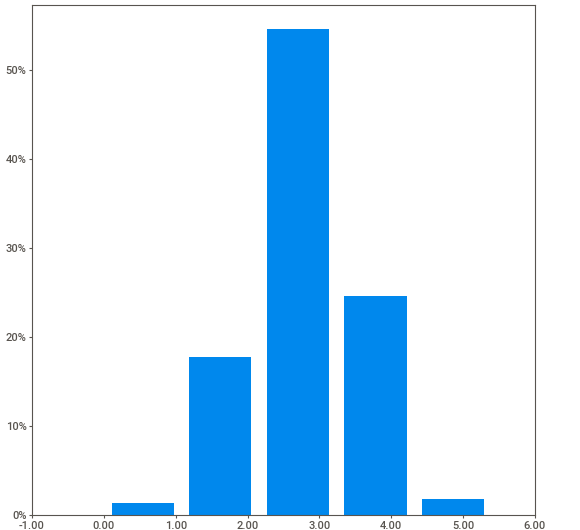
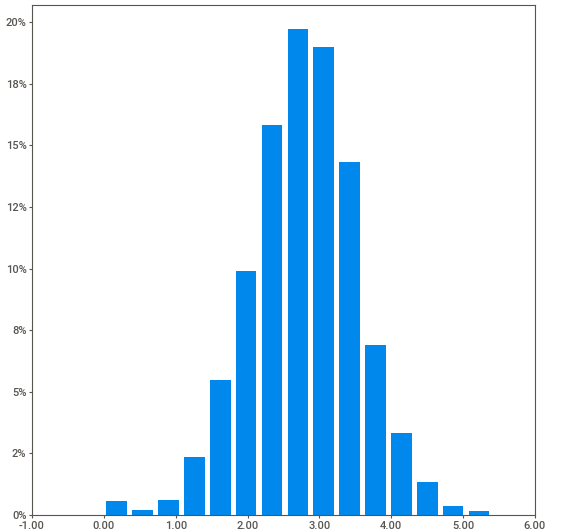
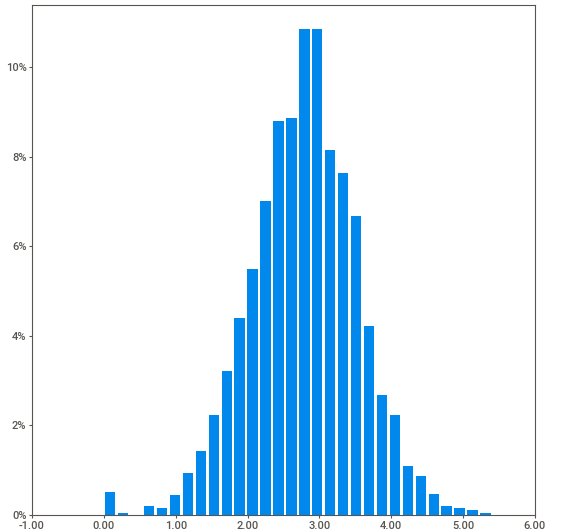
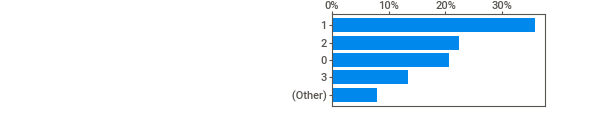
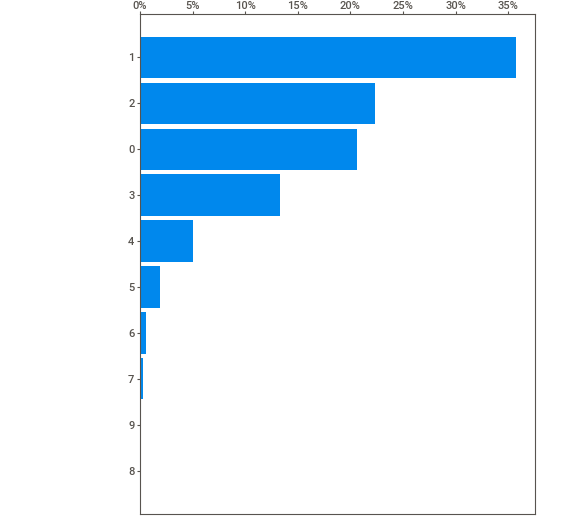
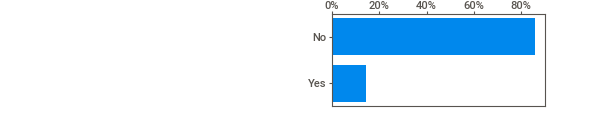
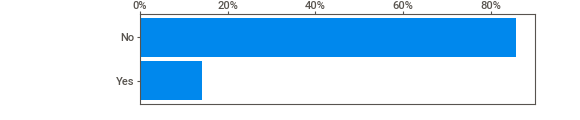
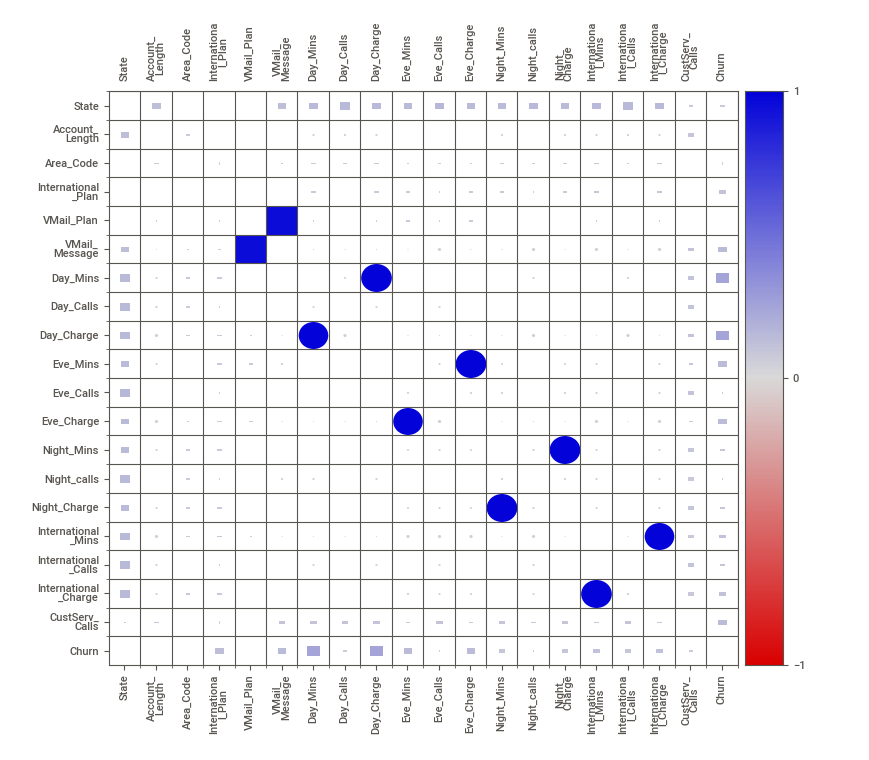
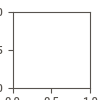

In [206]:
!pip install sweetviz  
#Automated Library for visualization

import sweetviz as sv #  library for univariant analysis
my_report = sv.analyze(df1)## pass the original dataframe
my_report.show_notebook()

Churn Flag

<AxesSubplot:xlabel='Churn', ylabel='count'>

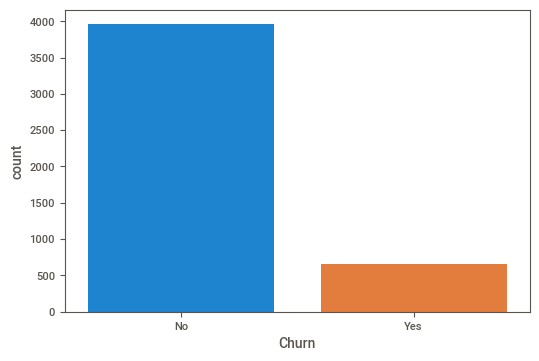

In [207]:
#visulazing target feature
sns.countplot(df1['Churn'])

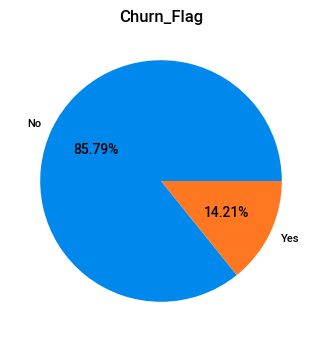

In [208]:
Churn_index=df1.Churn.value_counts().index
plt.title("Churn_Flag")
plt.pie(df1.Churn.value_counts(),labels=Churn_index\
       ,autopct='%1.2f%%',)
plt.show()

Observation:In Target Feature the 85.79% people not Migrateing and 14.21% pepole are leaving the network

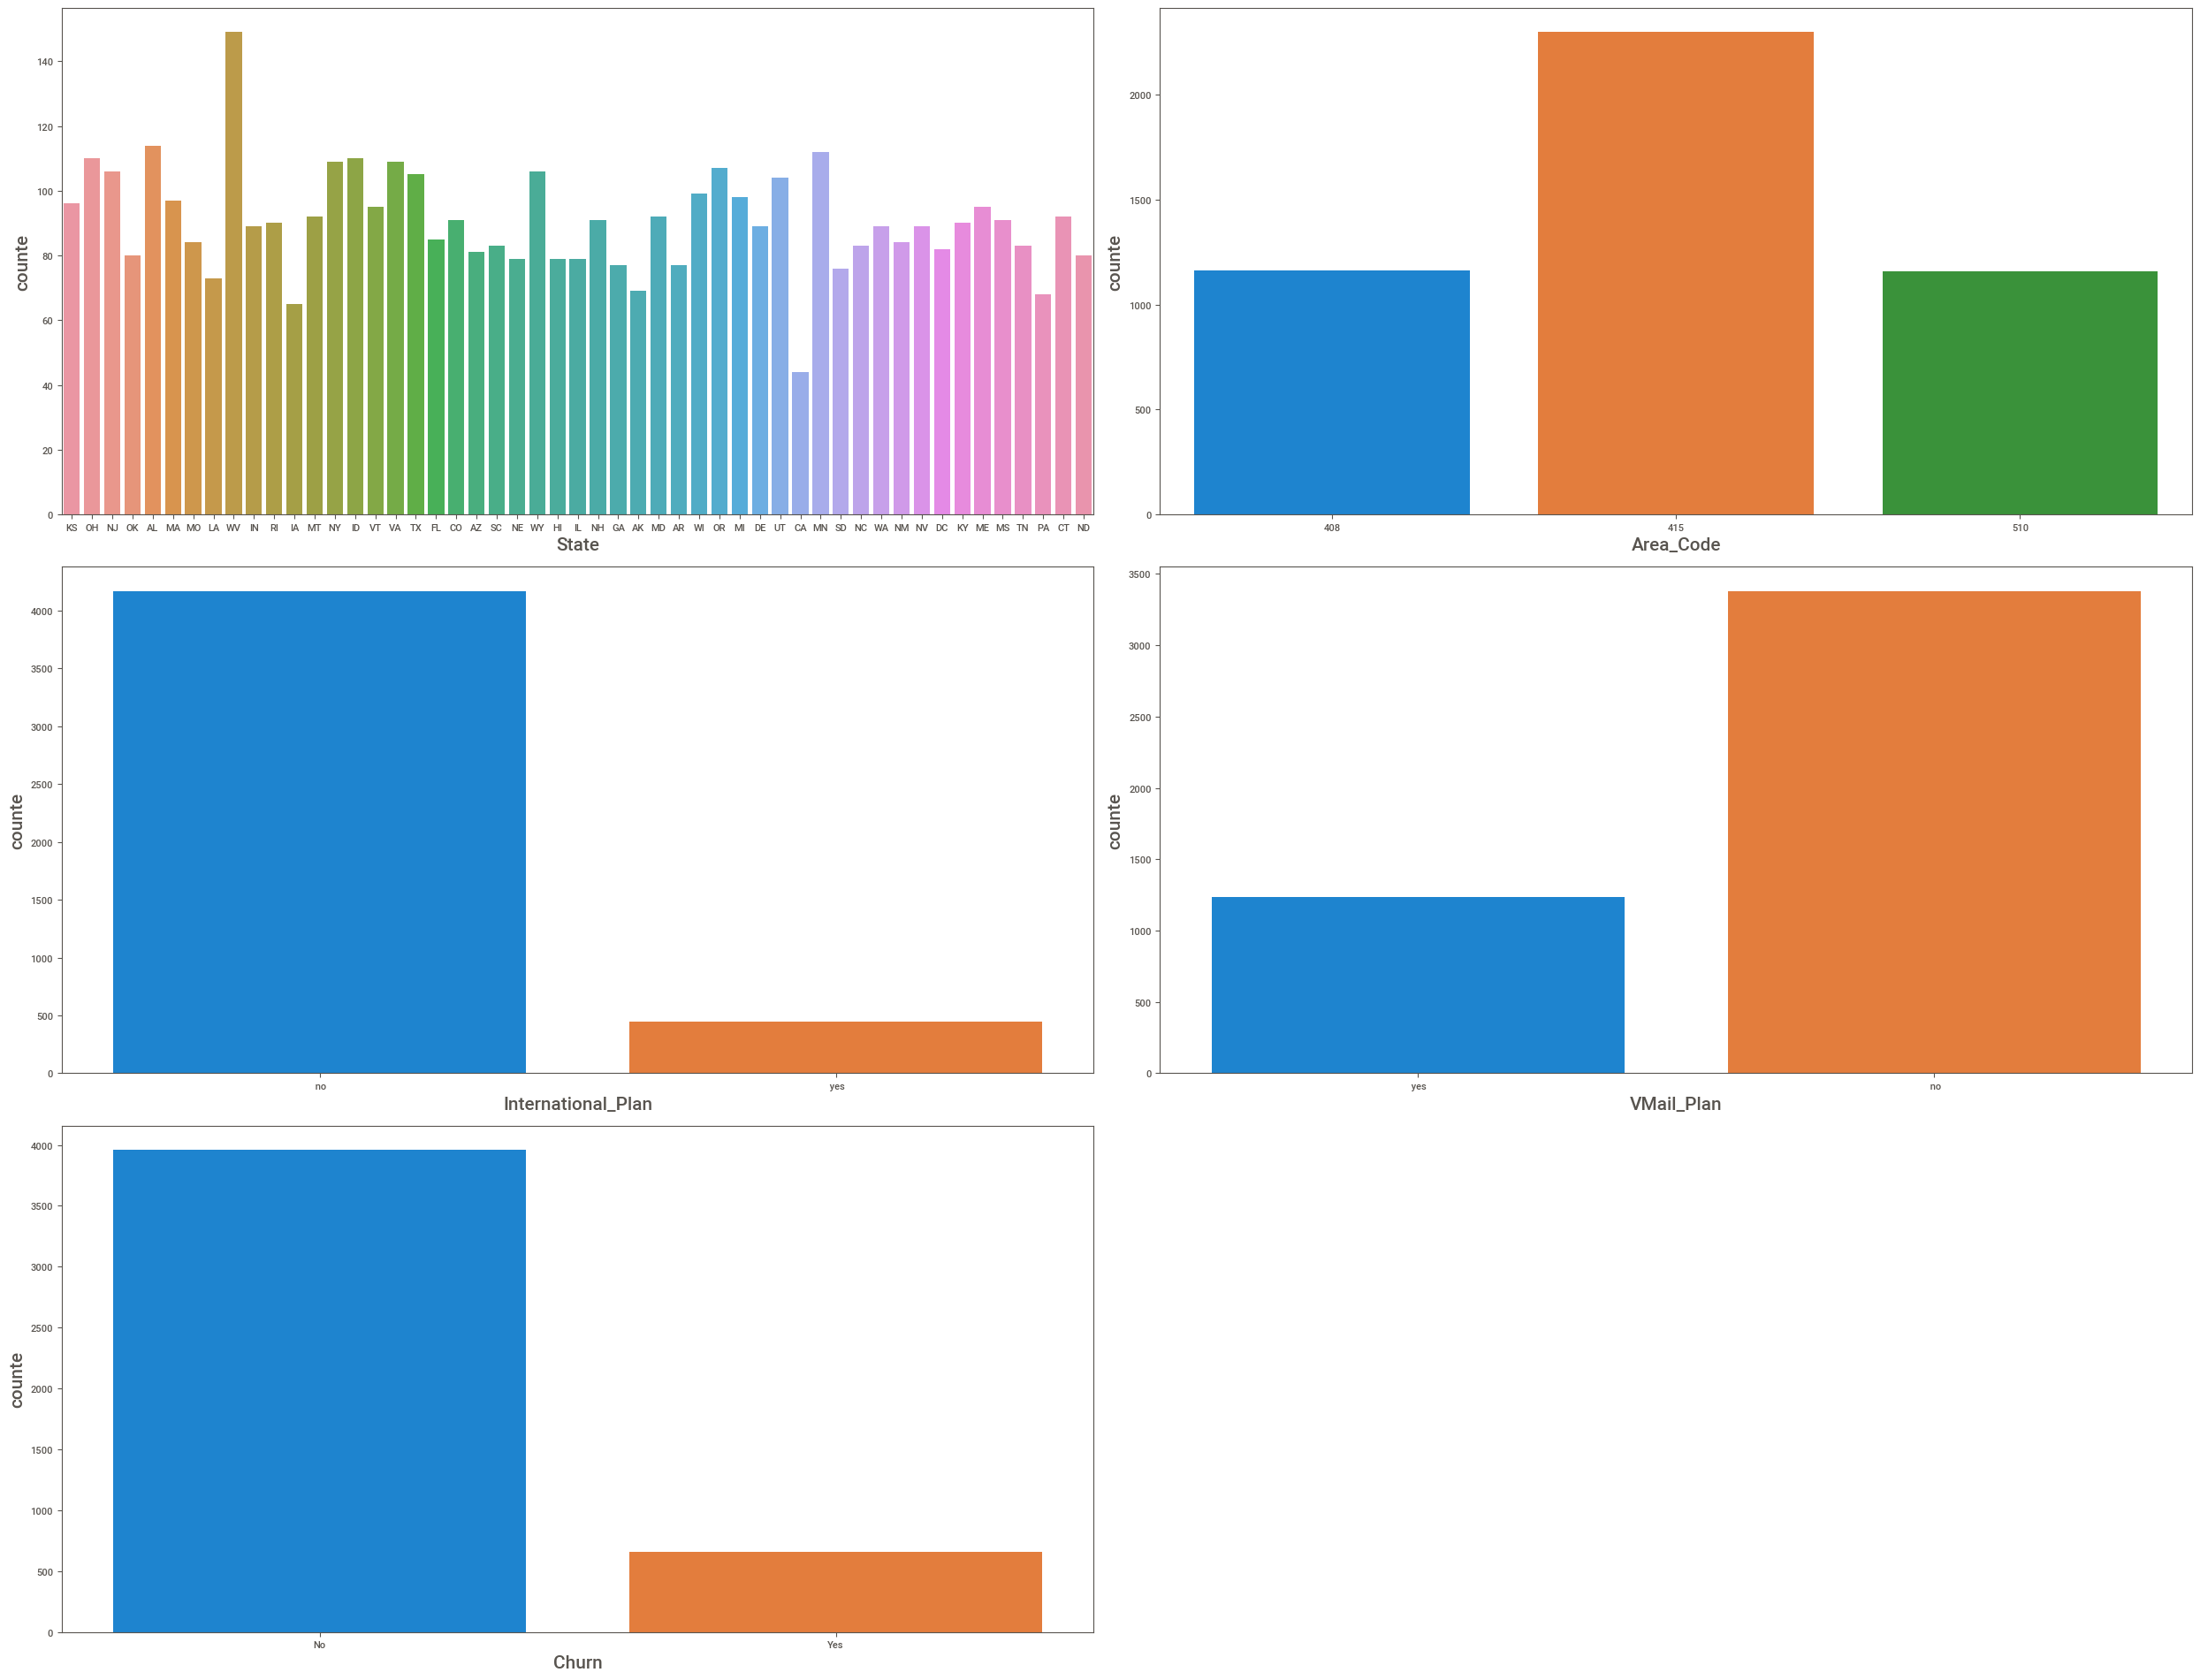

In [209]:
plt.figure(figsize=(25,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in categorical_data:#accessing the catogorical columns 
    if plotnumber<=6 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(x=categorical_data[column])
        plt.xlabel(column,fontsize=15)#assign name to x-axis and set font-20
        plt.ylabel('counte',fontsize=15)
    plotnumber+=1#counter increment
plt.tight_layout()

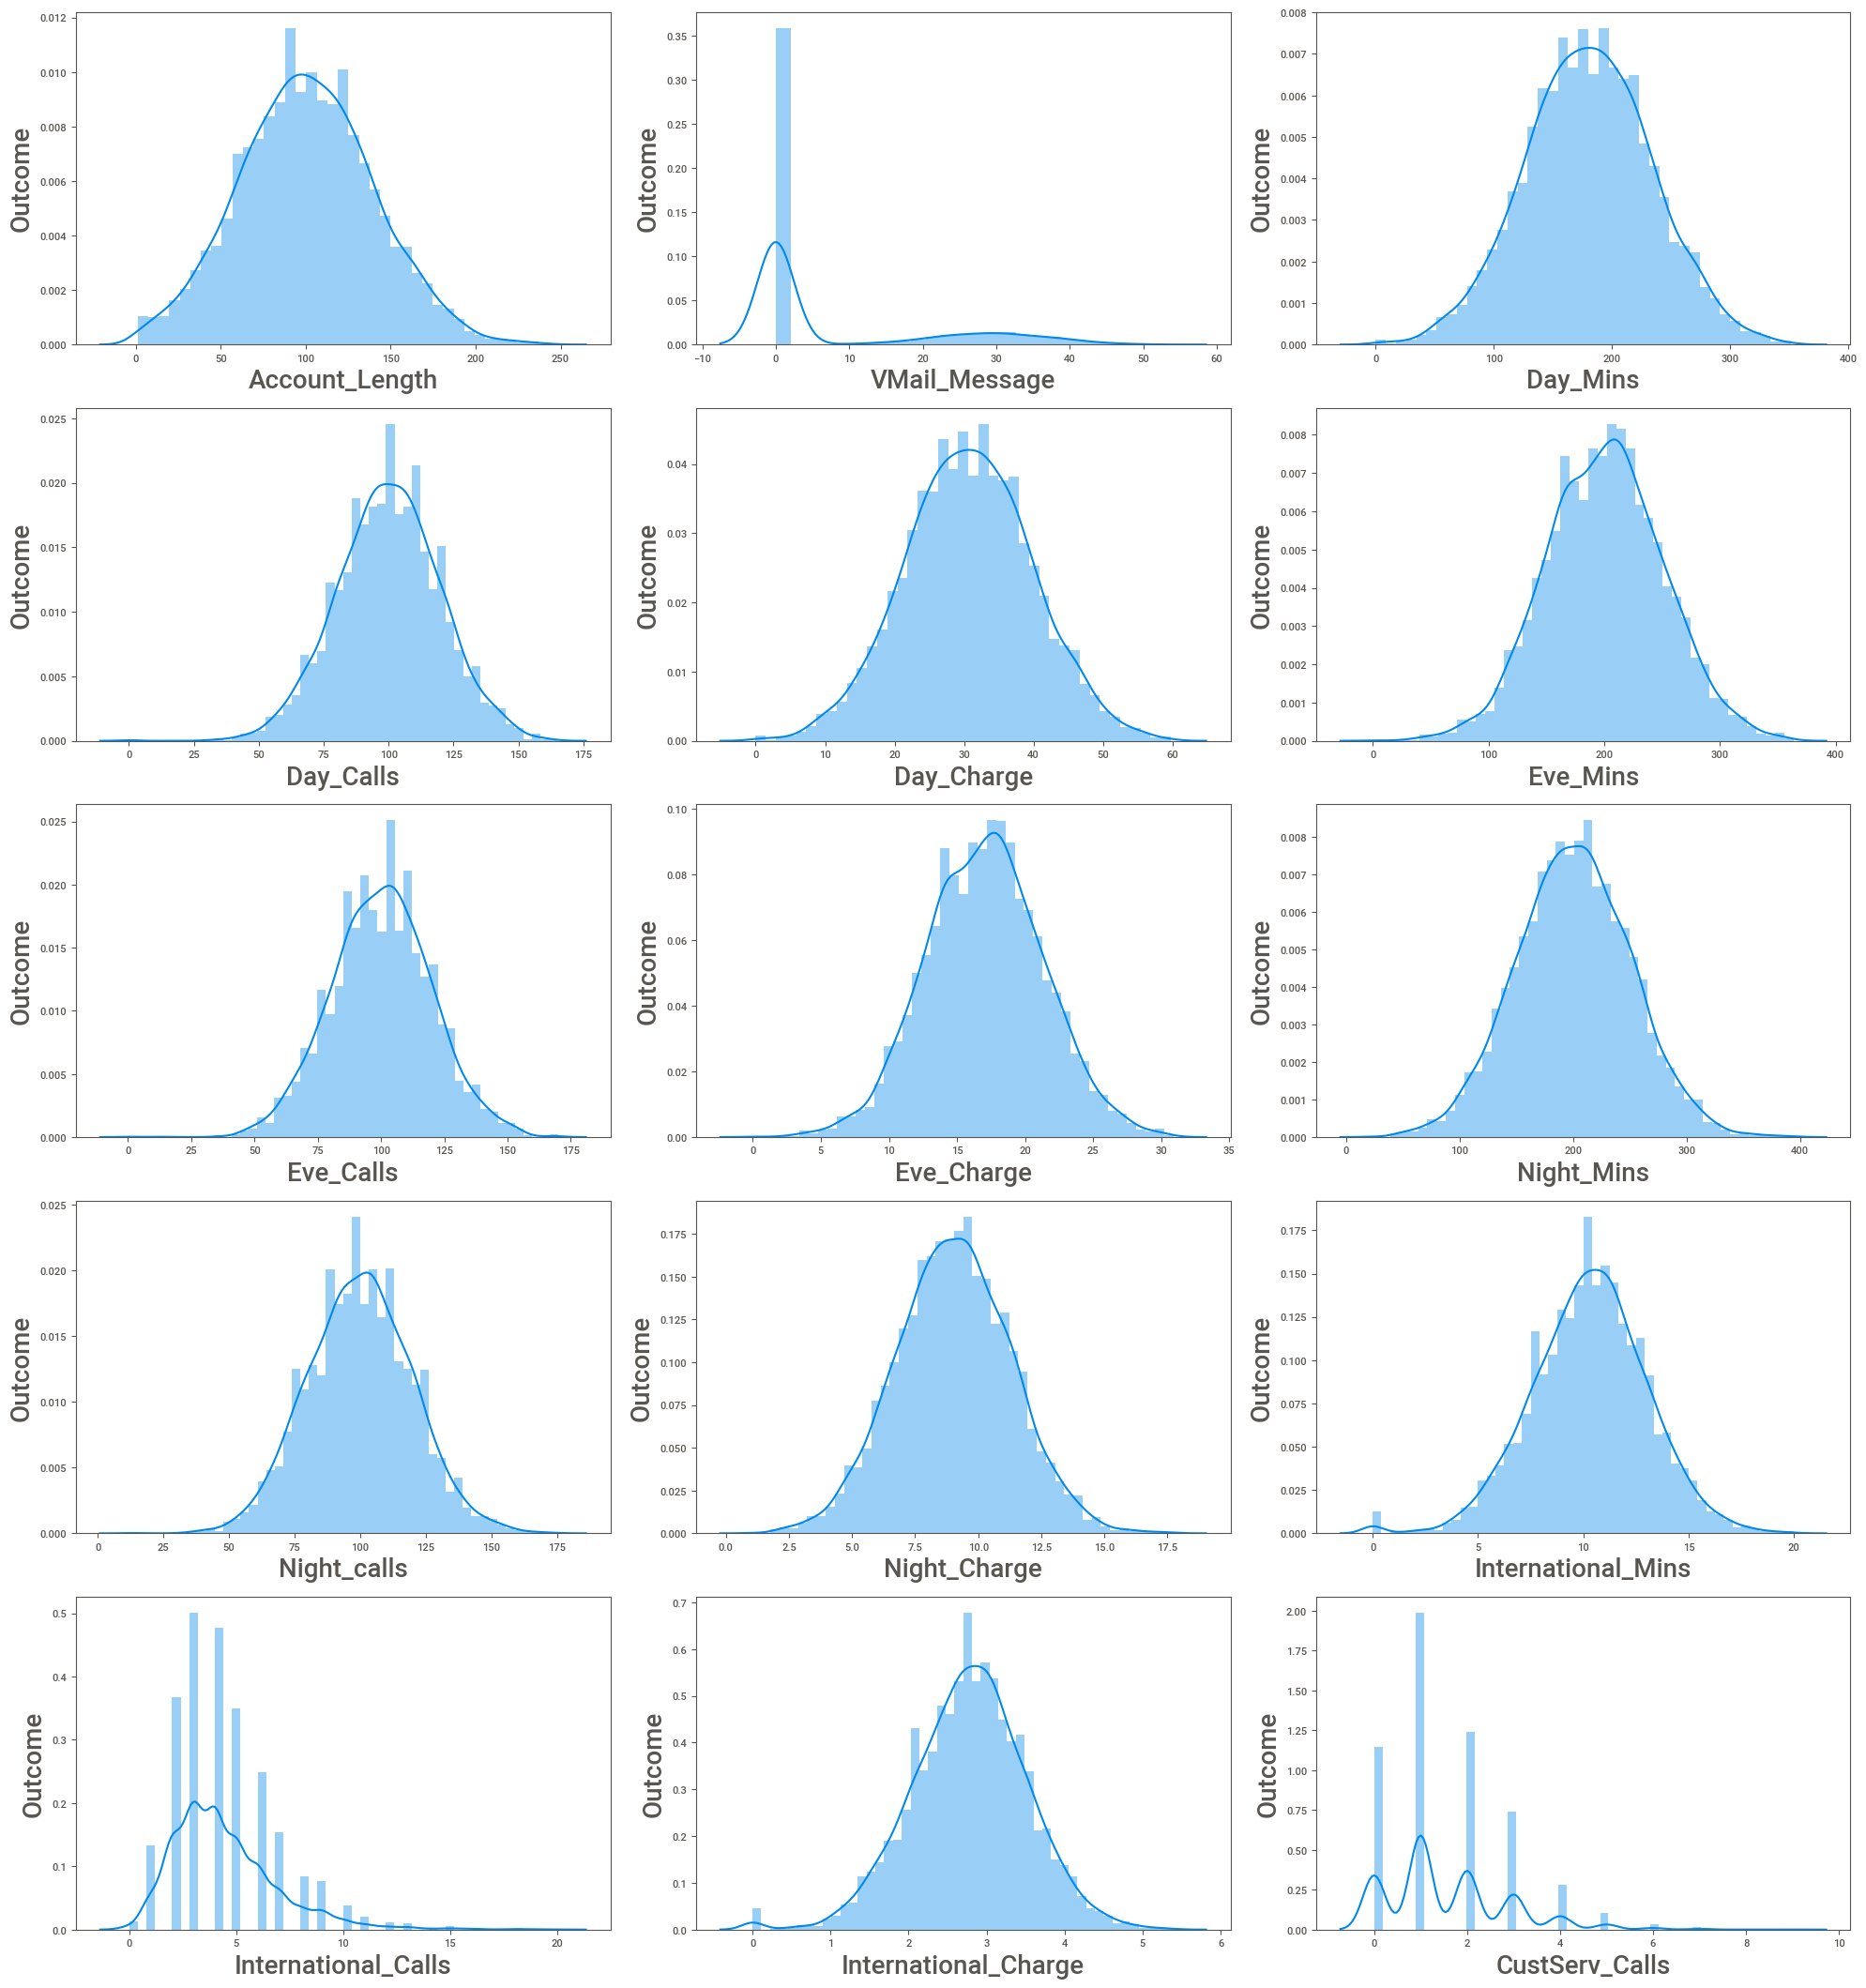

In [210]:

plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in numeric_data:#accessing the columns 
    if plotnumber<=17 :
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(x=numeric_data[column]  )
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

### The histogram shows the distribution of data and we can say that it is quite normal, while few are skewed.

In [211]:
df1.skew()

Account_Length          0.106248
Area_Code               1.135333
VMail_Message           1.326734
Day_Mins               -0.002948
Day_Calls              -0.081013
Day_Charge             -0.002952
Eve_Mins               -0.005280
Eve_Calls              -0.017554
Eve_Charge             -0.005252
Night_Mins              0.020515
Night_calls             0.030886
Night_Charge            0.020507
International_Mins     -0.220891
International_Calls     1.366420
International_Charge   -0.221342
CustServ_Calls          1.046800
dtype: float64

### Skew should be between -1.96 to +1.96 for normal distriburtion

In [212]:
df1.kurtosis()

Account_Length         -0.092552
Area_Code              -0.686039
VMail_Message           0.123526
Day_Mins               -0.042399
Day_Calls               0.196147
Day_Charge             -0.042264
Eve_Mins                0.043630
Eve_Calls               0.135980
Eve_Charge              0.043522
Night_Mins              0.061409
Night_calls             0.068815
Night_Charge            0.061380
International_Mins      0.671602
International_Calls     3.302927
International_Charge    0.672518
CustServ_Calls          1.515026
dtype: float64

### Kurtosis tells about the sharpness the curve

### Bivariense 

In [213]:
import warnings
warnings.filterwarnings("ignore")

#### Categorical  plot

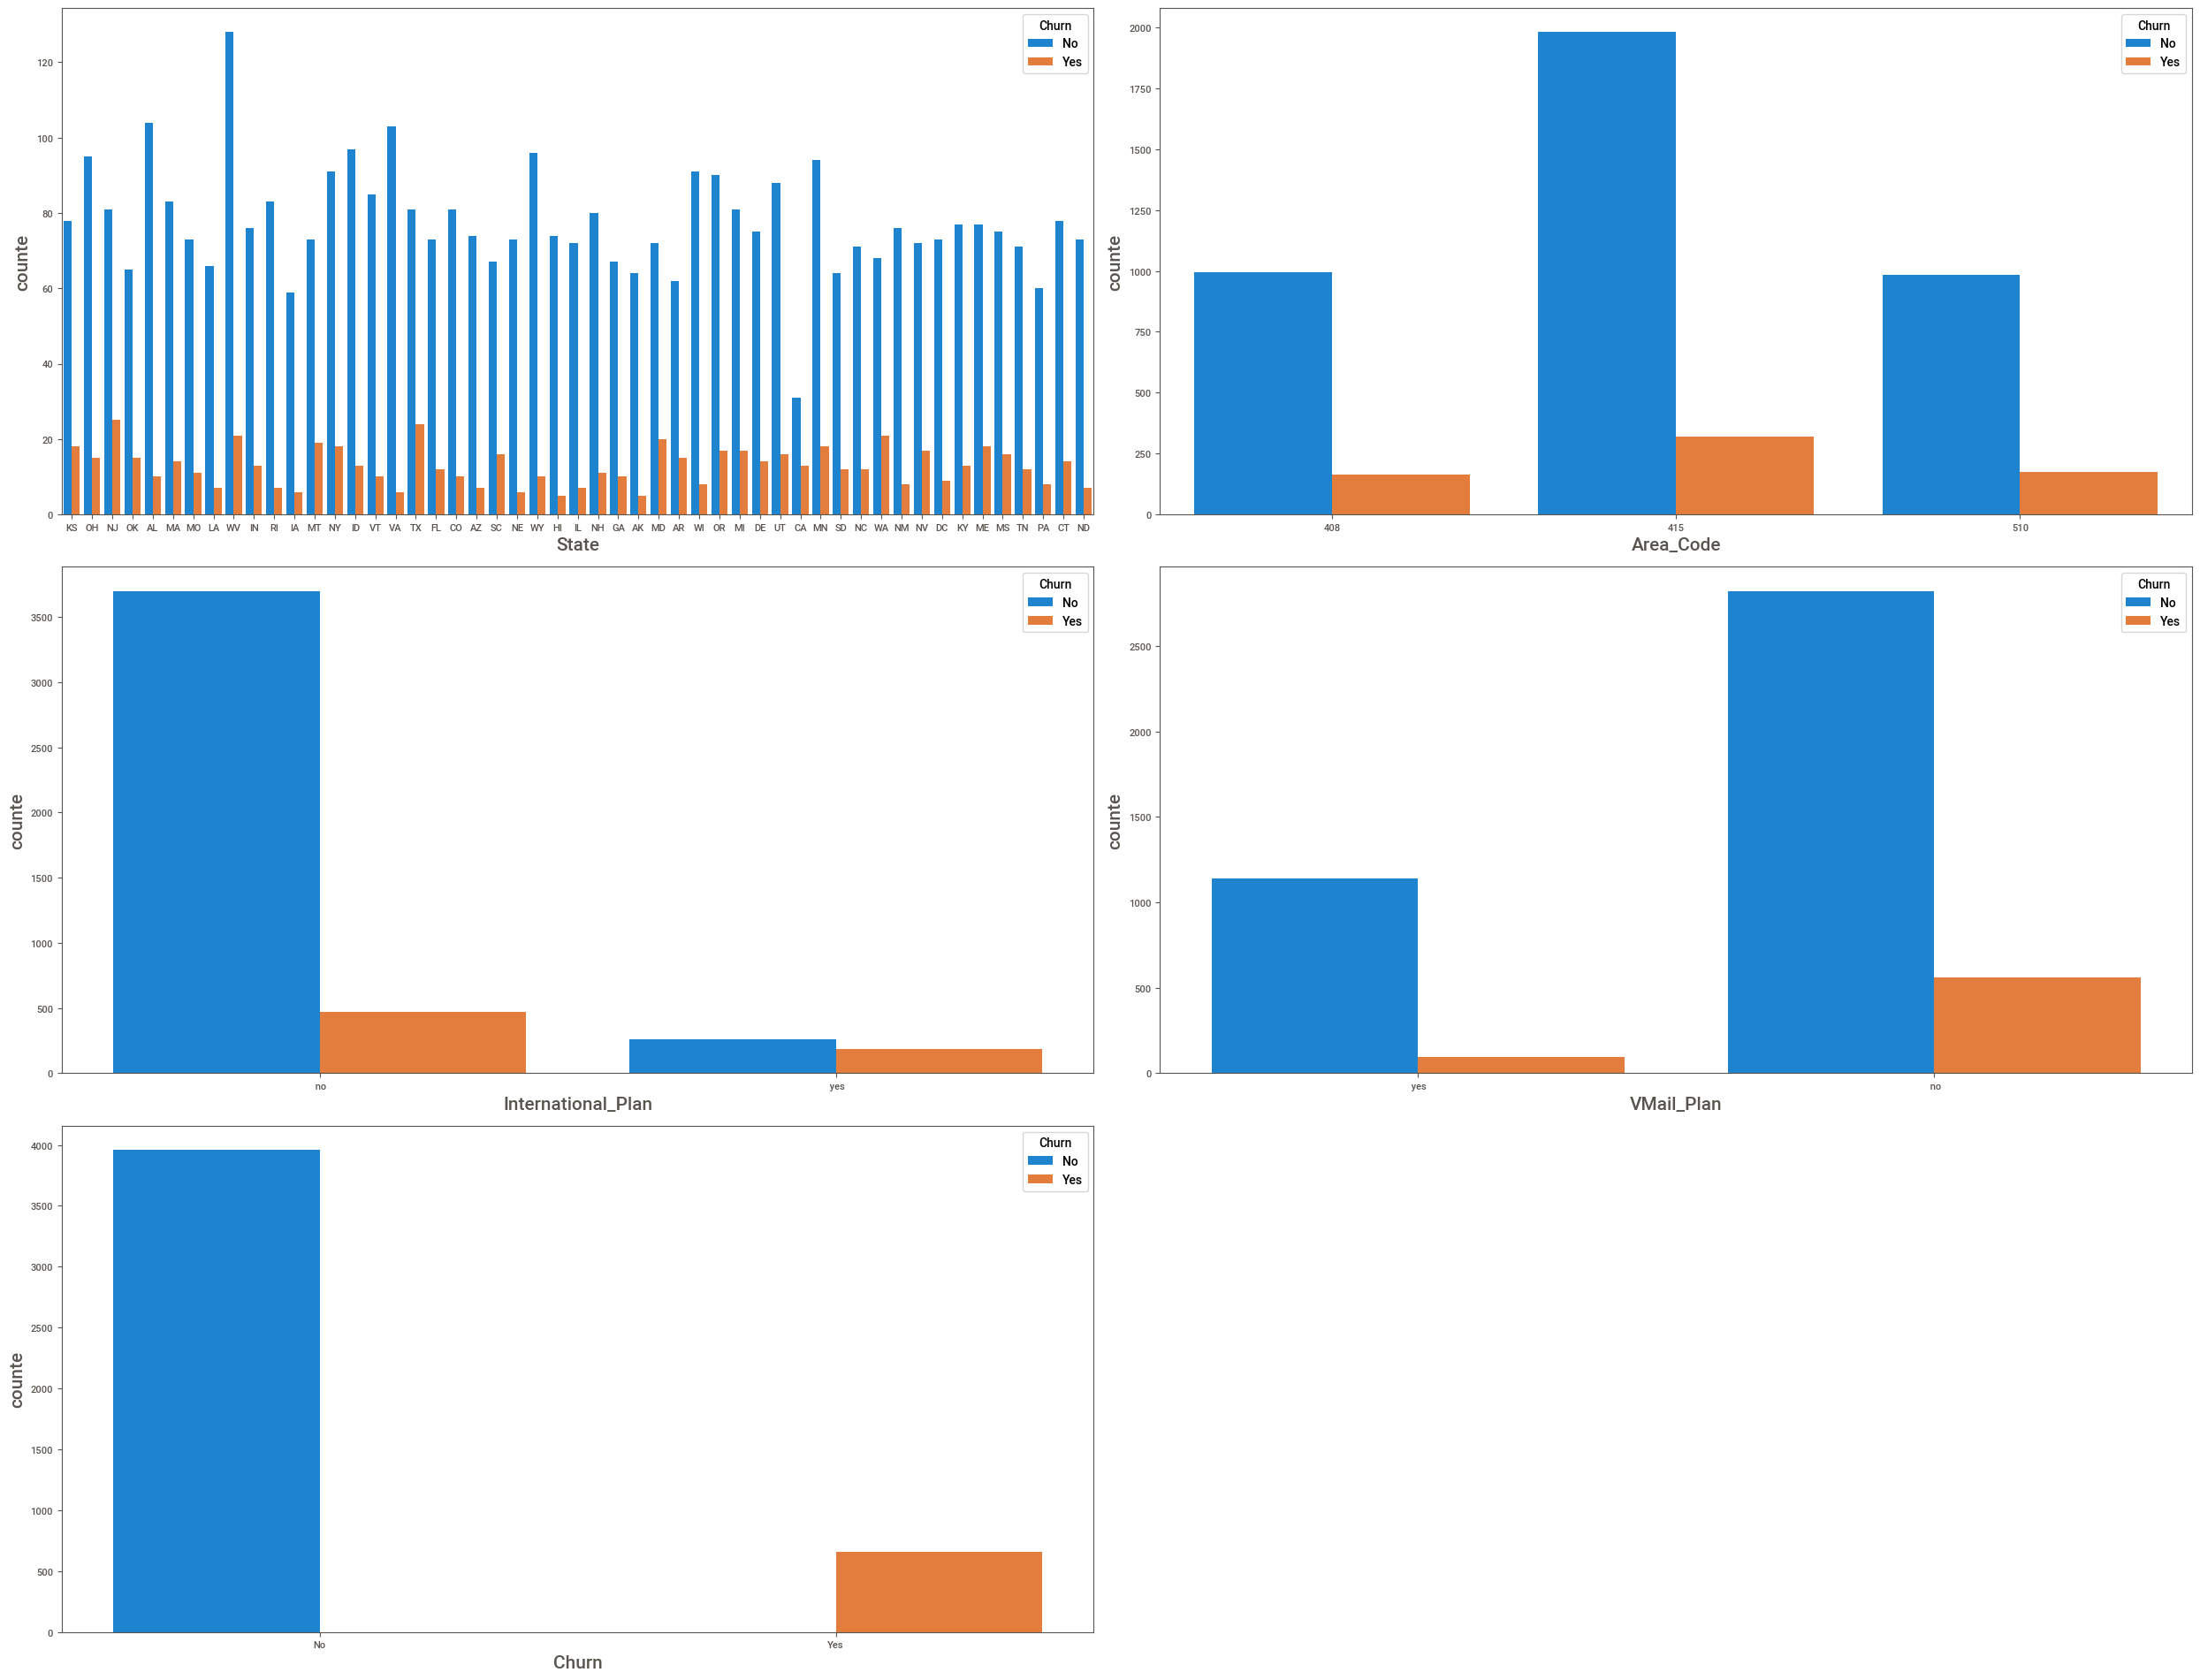

In [214]:
plt.figure(figsize=(25,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in categorical_data:#accessing the columns 
    if plotnumber<=6 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(x=categorical_data[column]
                        ,hue=df1.Churn)
        plt.xlabel(column,fontsize=15)#assign name to x-axis and set font-20
        plt.ylabel('counte',fontsize=15)
    plotnumber+=1#counter increment
plt.tight_layout()

#### Numerical Plot

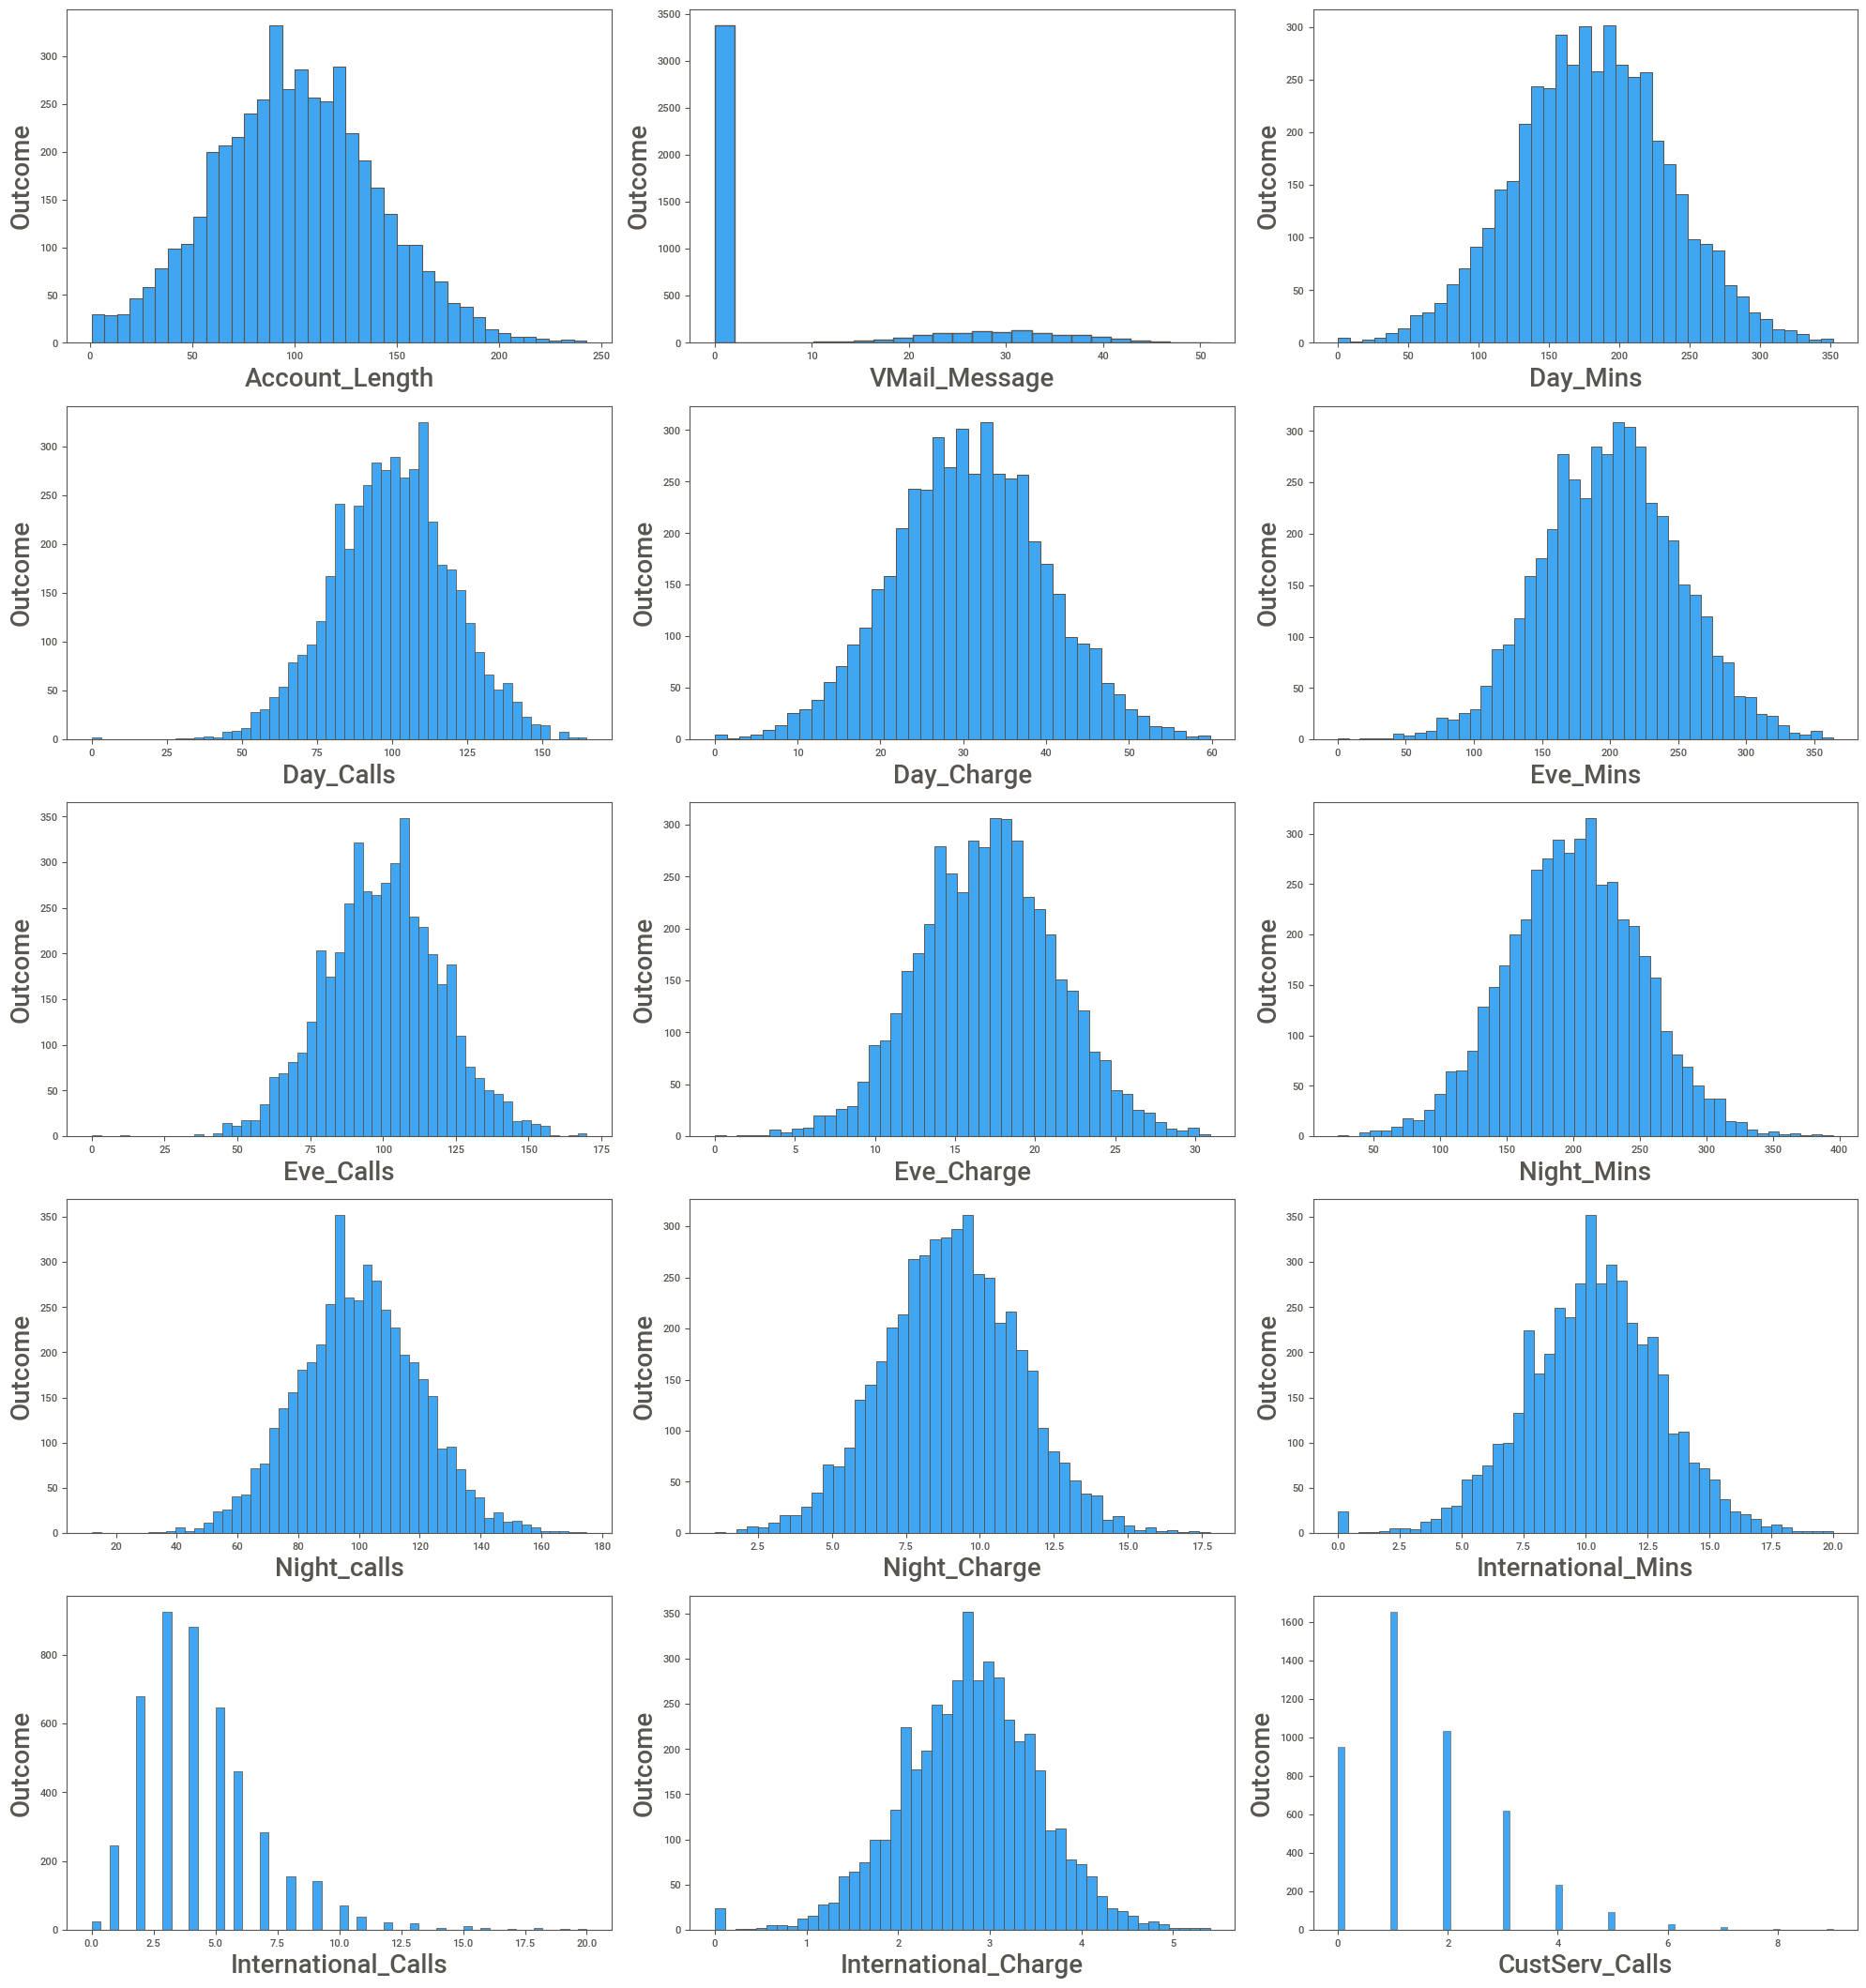

In [215]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter
for column in numeric_data:#accessing the columns 
    if plotnumber<=17 :
        ax = plt.subplot(6,3,plotnumber)
        sns.histplot(x=numeric_data[column]  )
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

#### Correlation Checking

In [216]:
corr=df1.corr()

<AxesSubplot:>

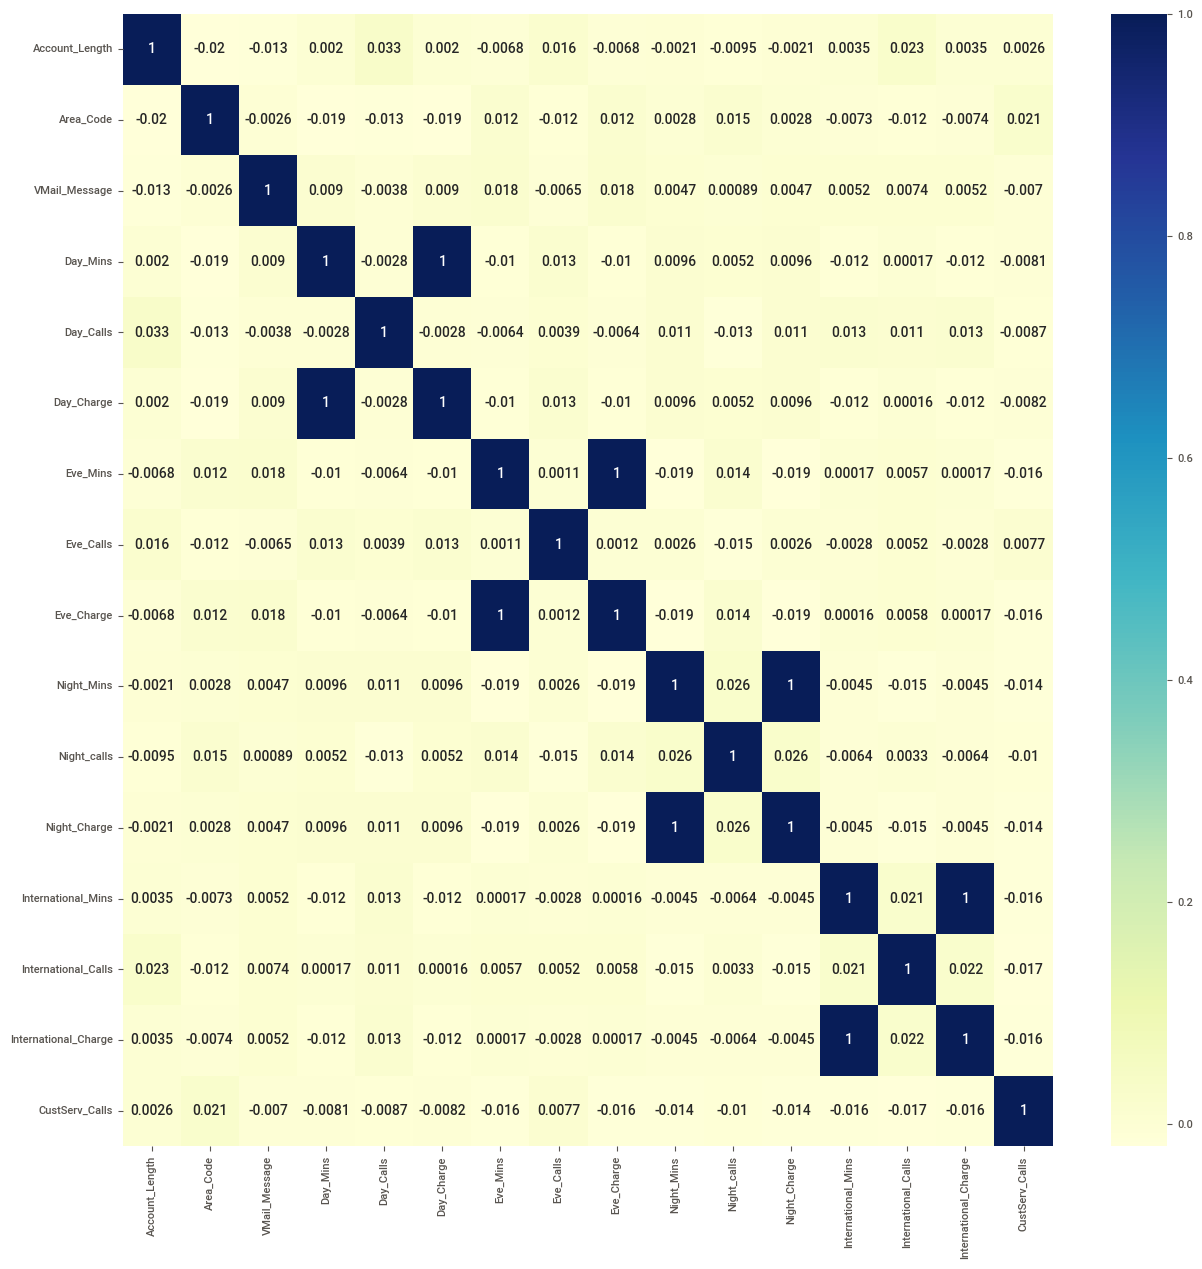

In [217]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap="YlGnBu",annot=True)

In correltaionthere are some features are highly correlated with other features so remove one of the the features 

In [218]:
# df1.drop(['Day_Mins','Eve_Mins','Night_Mins','International_Mins'],axis=1,inplace=True)

droped a Day_mins,Eve_mins,Night_mins,International_mins

## Outlier detecting and removing

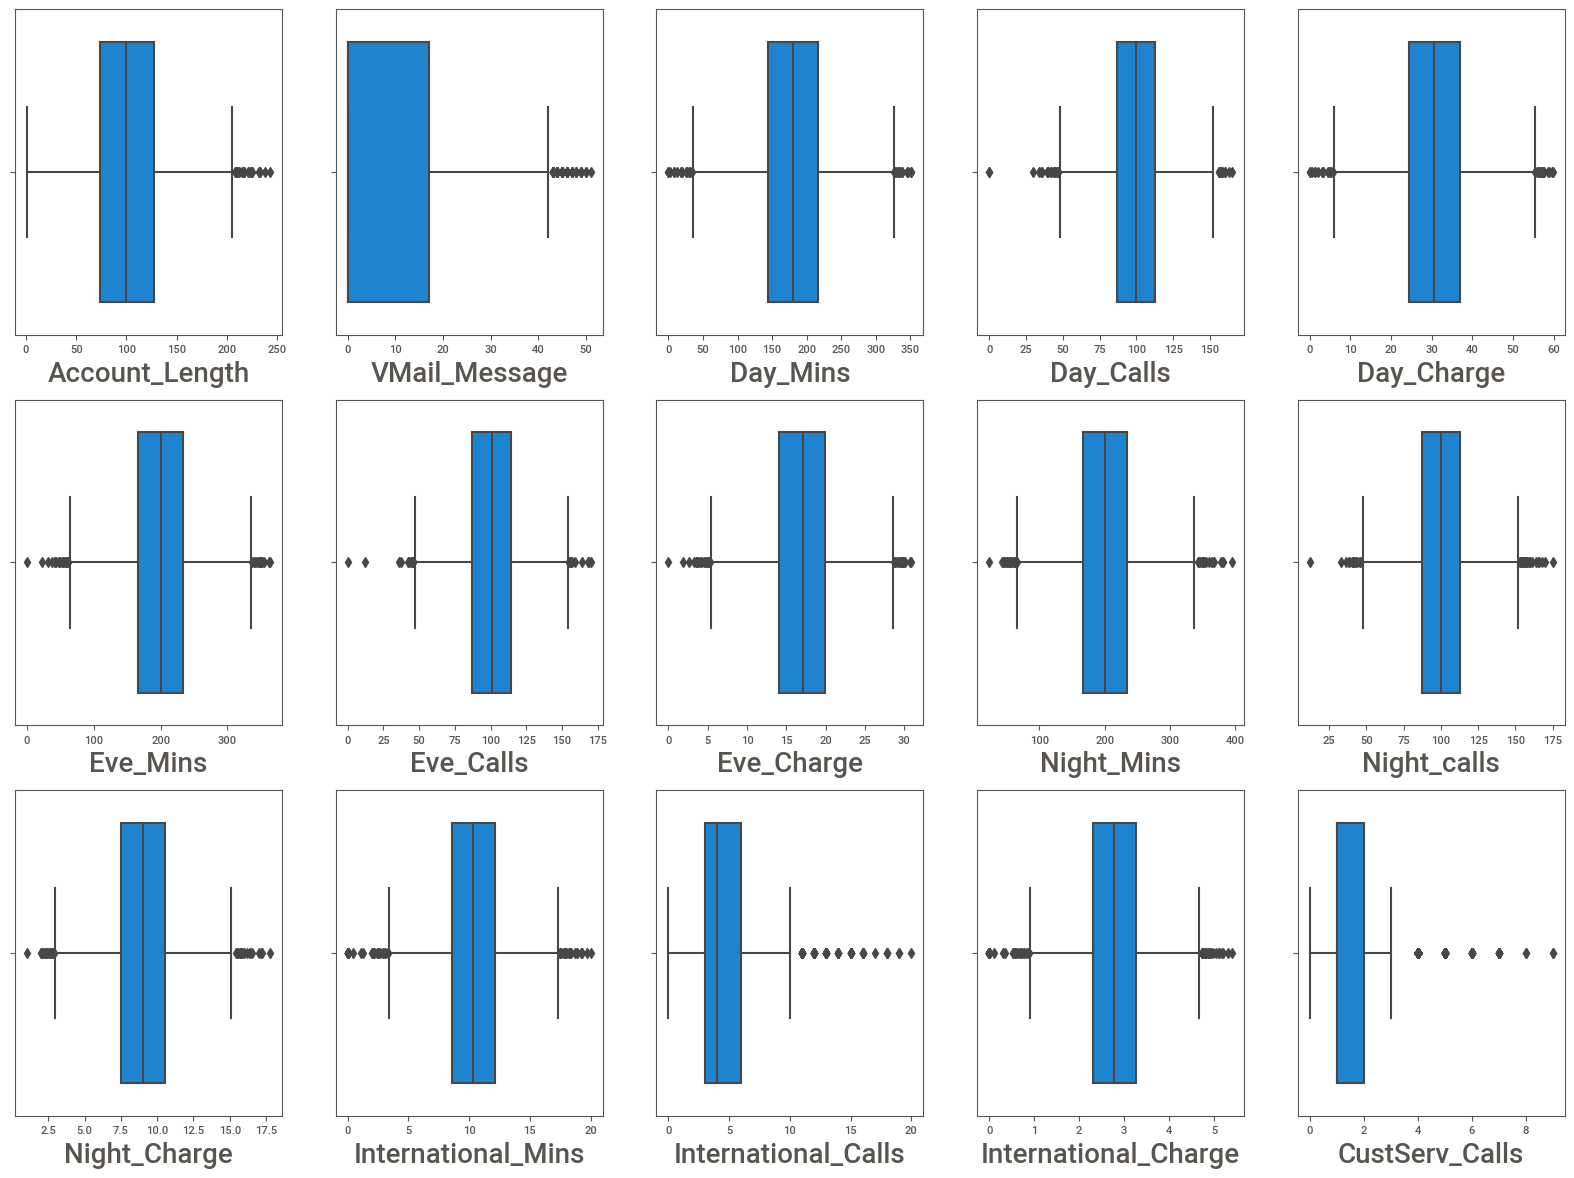

In [219]:
# Checking for outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data :
    if plotnumber<=21 :
        ax = plt.subplot(5,5,plotnumber)
        sns.boxplot(numeric_data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

each numirical data have some outliers 

In [220]:
def drop_outliers(data,name):
    q1,q3=np.percentile(data,[25,75])
    iqr=q3-q1
    lower_fence=q1-(1.5*iqr)
    upper_fence=q3+(1.5*iqr)
    df1.drop(df1[data<=lower_fence].index, inplace = True)
    df1.drop(df1[data>=upper_fence].index,inplace=True)
    print('The outliers in {} is removed:'.format(name))
    print(lower_fence,upper_fence)
    return 

In [221]:
numeric_data1=df1[['Account_Length','Day_Calls','Day_Charge','Eve_Calls','Eve_Charge','Night_calls','Night_Charge','International_Calls','International_Charge','CustServ_Calls']]
for column in numeric_data1:
    drop_outliers(df1[column],column)

The outliers in Account_Length is removed:
-5.5 206.5
The outliers in Day_Calls is removed:
48.0 152.0
The outliers in Day_Charge is removed:
5.860000000000003 55.459999999999994
The outliers in Eve_Calls is removed:
46.5 154.5
The outliers in Eve_Charge is removed:
5.520000000000001 28.5
The outliers in Night_calls is removed:
45.5 153.5
The outliers in Night_Charge is removed:
2.9412499999999993 15.151250000000001
The outliers in International_Calls is removed:
-1.5 10.5
The outliers in International_Charge is removed:
0.8949999999999996 4.695
The outliers in CustServ_Calls is removed:
-0.5 3.5


Removes a outliers 

In [223]:
numeric_data1=df1[['Day_Mins','Eve_Mins','Night_Mins','International_Mins','Account_Length','Day_Calls','Day_Charge','Eve_Calls','Eve_Charge','Night_calls','Night_Charge','International_Calls','International_Charge','CustServ_Calls']]

<AxesSubplot:xlabel='CustServ_Calls'>

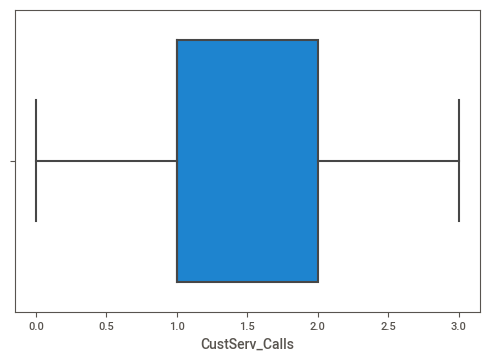

In [224]:
sns.boxplot(df1.CustServ_Calls)

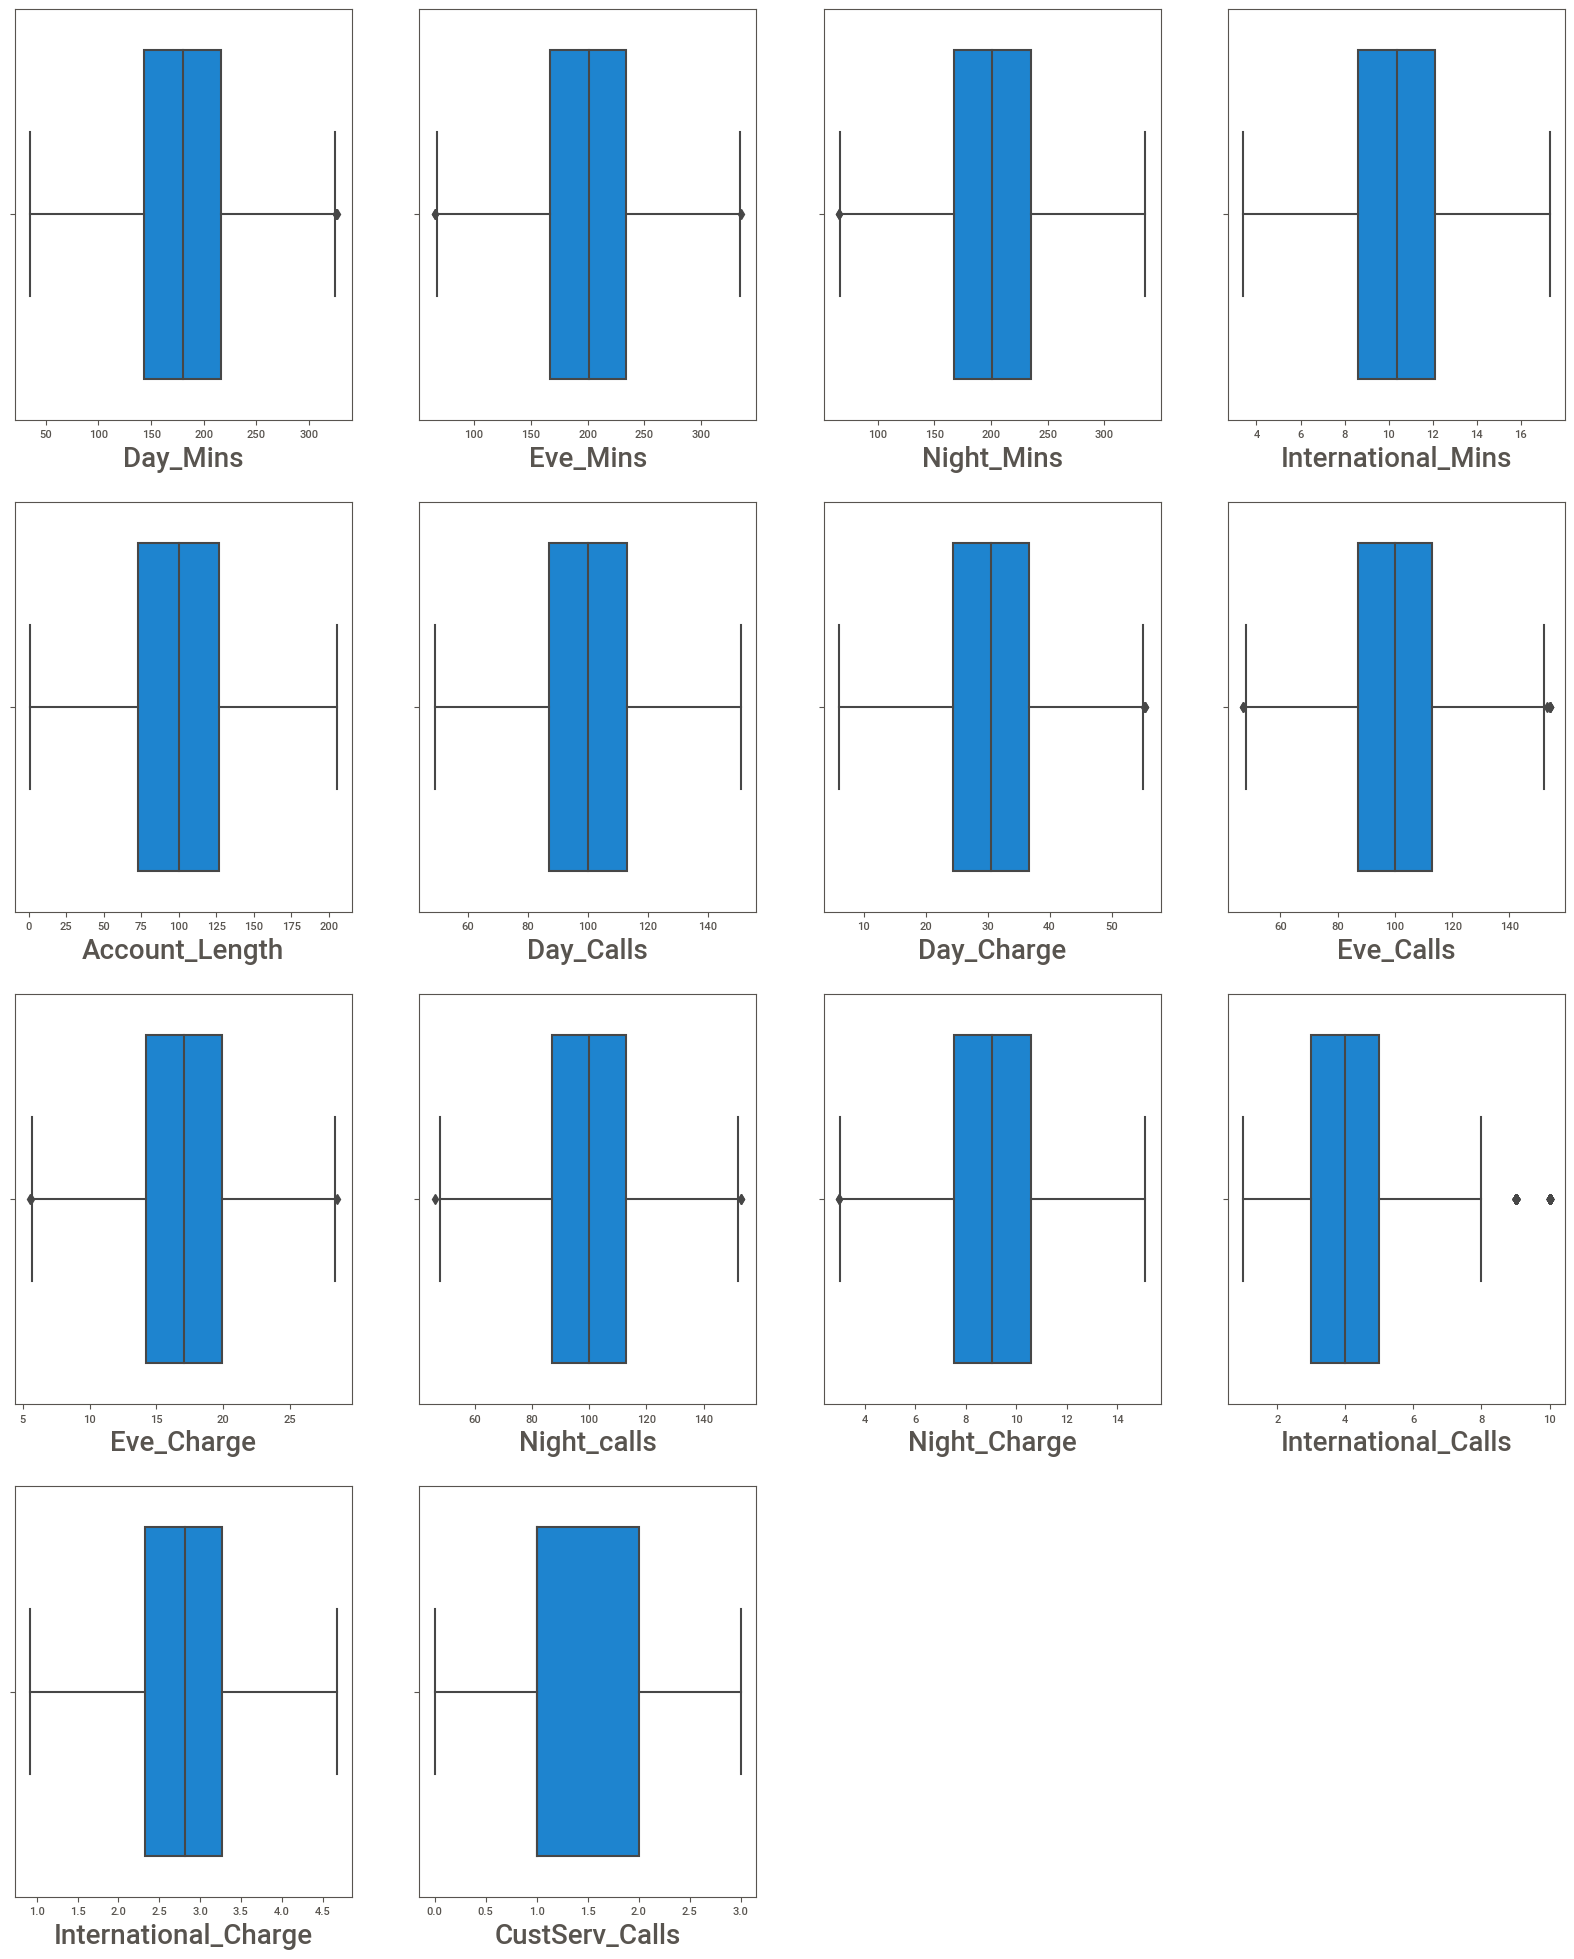

In [225]:
# Checking for outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data1 :
    if plotnumber<=21 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(numeric_data1[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

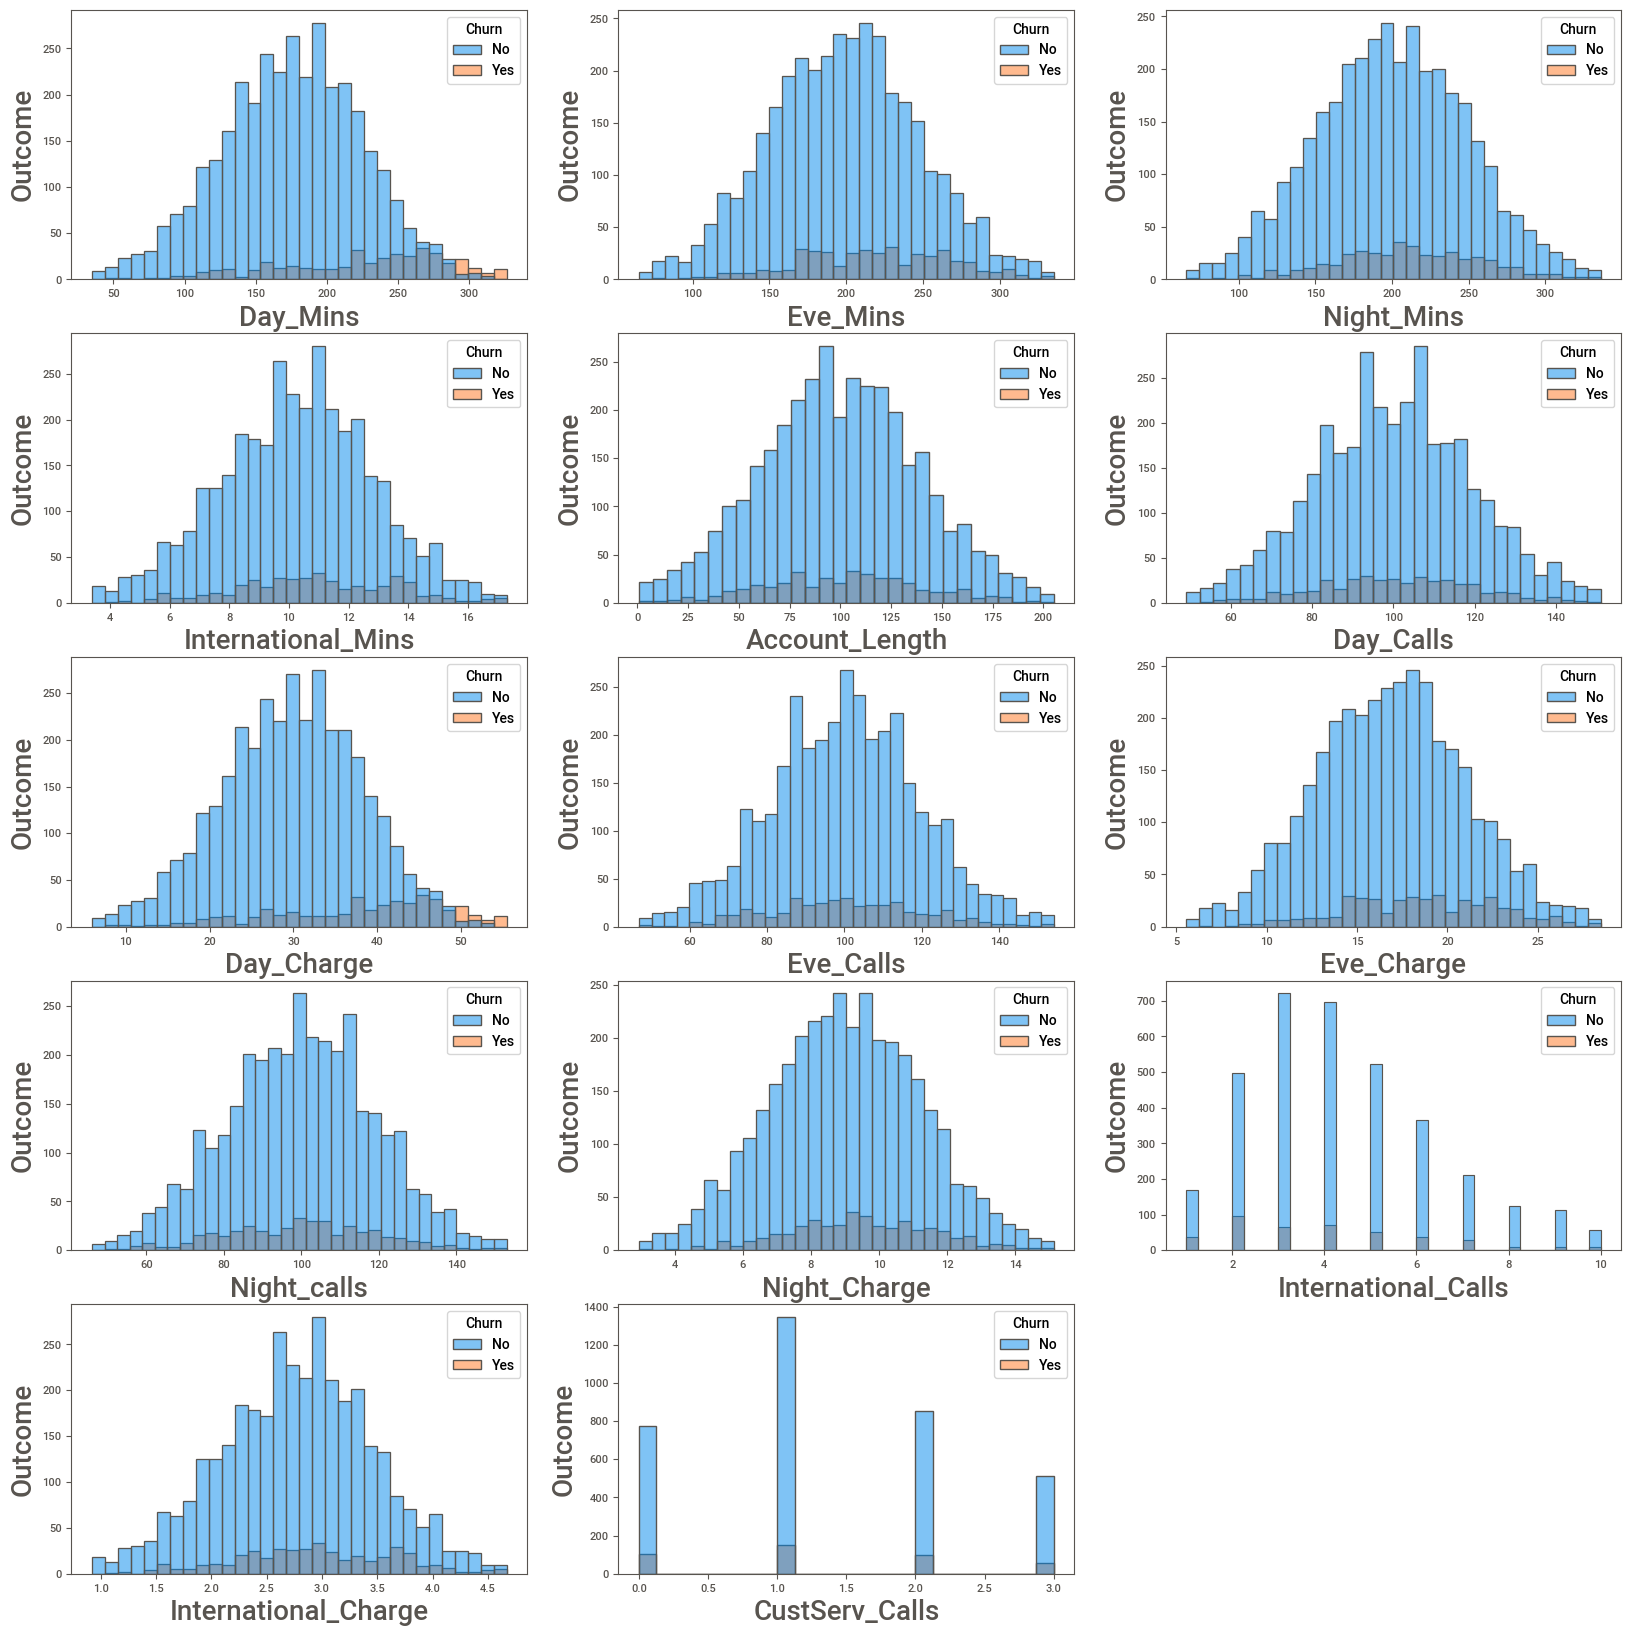

In [226]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in numeric_data1:#accessing the columns 
    if plotnumber<=17 :
        plt.subplot(6,3,plotnumber)
        sns.histplot(x=numeric_data1[column],hue=df1.Churn)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1#counter increment

In [227]:
#import statsmodels.api as sm 
# import pylab as py
# py.figure(figsize=(25,25))

# for column in numeric_data1:#accessing the columns 
#         sm.qqplot(df1[column], line ='s')
#         py.subplot
#         py.title(column)
#         py.show()

## Lable Encoding

In [228]:
#install Sklearn
!pip install sklearn

In [229]:
#importe LableEncoder
from sklearn.preprocessing import LabelEncoder

In [230]:
le=LabelEncoder()

In [231]:
#converting catogorical to numarical

In [232]:
#state
df1['State']=le.fit_transform(df1['State'])

In [233]:
#Internatinal plan
df1['International_Plan']=le.fit_transform(df1['International_Plan'])

In [234]:
#vmail,area code, Churn
df1['VMail_Plan']=le.fit_transform(df1['VMail_Plan'])
df1.Area_Code.replace([408,415,510],[0,1,2],inplace=True,)
df1.Churn.replace(['No','Yes'],[0,1],inplace=True,)
df1.Churn.value_counts()

0    3480
1     410
Name: Churn, dtype: int64

In [235]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 3890 non-null   int32  
 1   Account_Length        3890 non-null   int64  
 2   Area_Code             3890 non-null   int64  
 3   International_Plan    3890 non-null   int32  
 4   VMail_Plan            3890 non-null   int32  
 5   VMail_Message         3890 non-null   int64  
 6   Day_Mins              3890 non-null   float64
 7   Day_Calls             3890 non-null   int64  
 8   Day_Charge            3890 non-null   float64
 9   Eve_Mins              3890 non-null   float64
 10  Eve_Calls             3890 non-null   int64  
 11  Eve_Charge            3890 non-null   float64
 12  Night_Mins            3890 non-null   float64
 13  Night_calls           3890 non-null   int64  
 14  Night_Charge          3890 non-null   float64
 15  International_Mins   

In [236]:
df1=df1.astype({"Day_Charge":"int64",'State':'int64','International_Plan':'int64','VMail_Plan':'int64','Eve_Charge':'int64'\
               ,'Night_Charge':'int64','International_Charge':'int64','Churn':'int64'})

In [237]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 3890 non-null   int64  
 1   Account_Length        3890 non-null   int64  
 2   Area_Code             3890 non-null   int64  
 3   International_Plan    3890 non-null   int64  
 4   VMail_Plan            3890 non-null   int64  
 5   VMail_Message         3890 non-null   int64  
 6   Day_Mins              3890 non-null   float64
 7   Day_Calls             3890 non-null   int64  
 8   Day_Charge            3890 non-null   int64  
 9   Eve_Mins              3890 non-null   float64
 10  Eve_Calls             3890 non-null   int64  
 11  Eve_Charge            3890 non-null   int64  
 12  Night_Mins            3890 non-null   float64
 13  Night_calls           3890 non-null   int64  
 14  Night_Charge          3890 non-null   int64  
 15  International_Mins   

<AxesSubplot:>

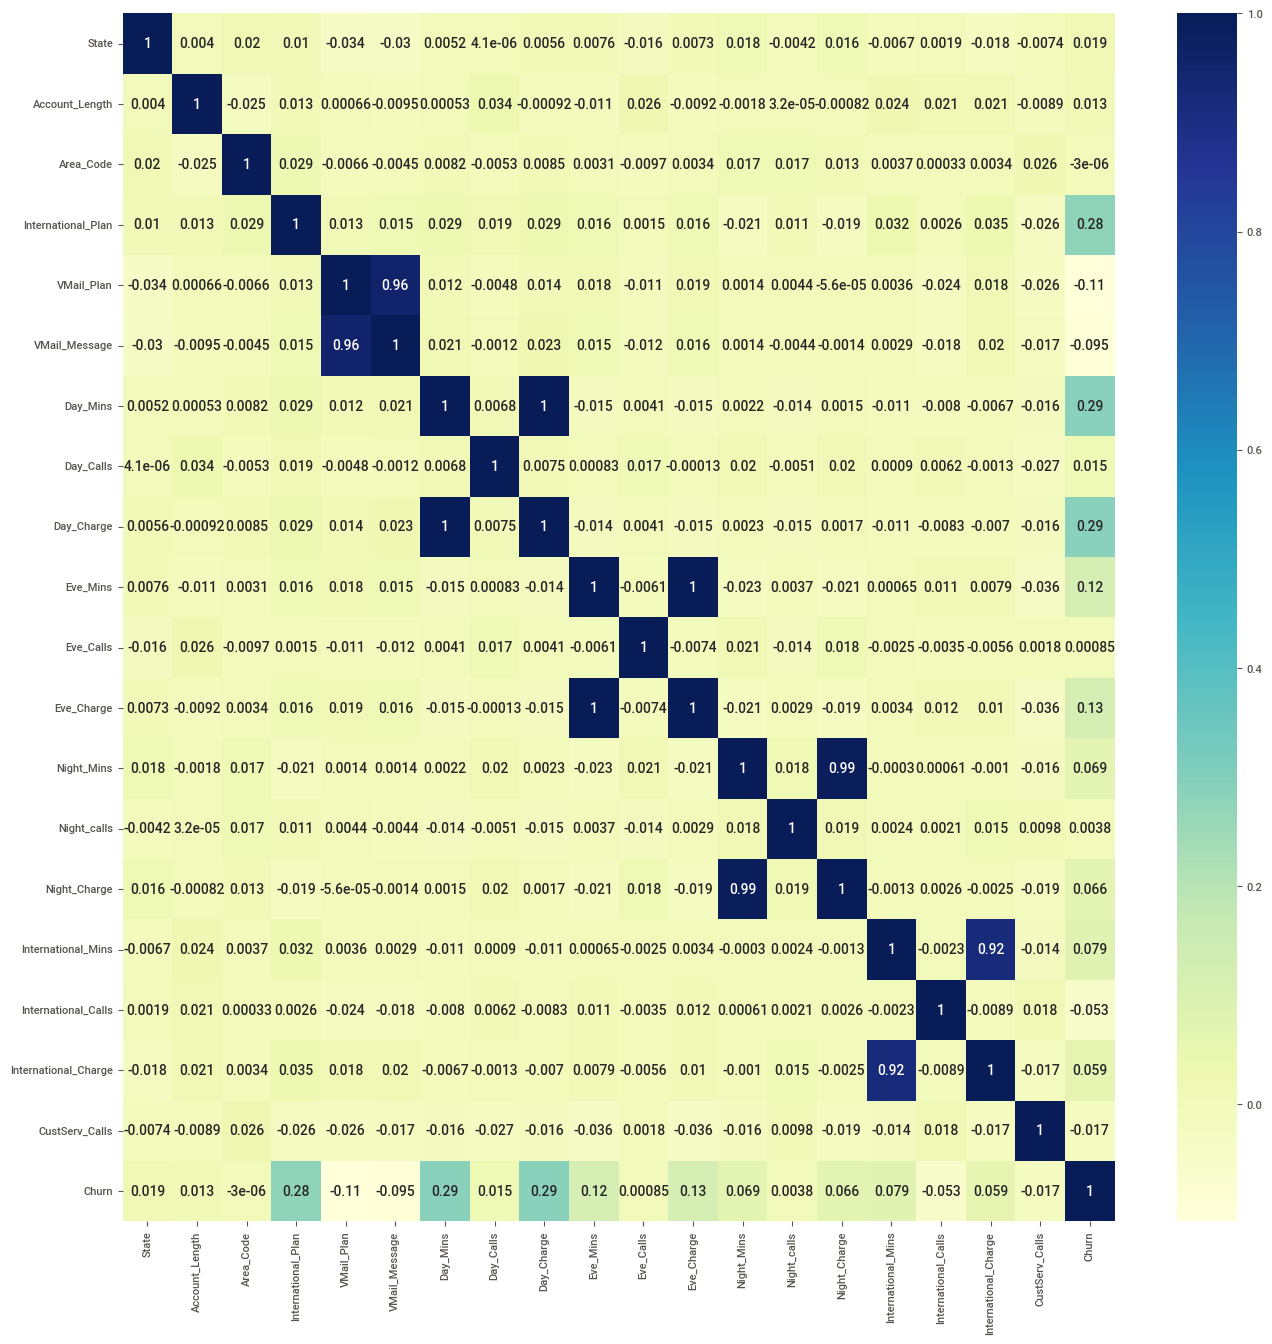

In [238]:
#checking correlation once again
plt.figure(figsize=(16,16))
corr=df1.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')

In [239]:
df1.drop(['VMail_Message'],axis=1,inplace=True)

In [240]:
df2=df1.loc[df1['Churn']==1]

In [241]:
df1.drop(['Day_Mins','Eve_Mins','Night_Mins','International_Mins'],axis=1,inplace=True)

### dependent and independent variable saperation

In [242]:
X=df1.drop(labels='Churn',axis=1)
y=df1['Churn']

In [243]:
X1=X.copy()
y1=y.copy()

In [244]:
y.value_counts()

0    3480
1     410
Name: Churn, dtype: int64

## case 1

##  Feature Importence

In [245]:
# uning ExtraTreesClassifieries
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [246]:
print(model.feature_importances_)

[0.06029408 0.05985762 0.0352251  0.09117875 0.02772088 0.06189241
 0.22032882 0.06279116 0.08841951 0.06197261 0.06044222 0.08209394
 0.04856003 0.03922288]


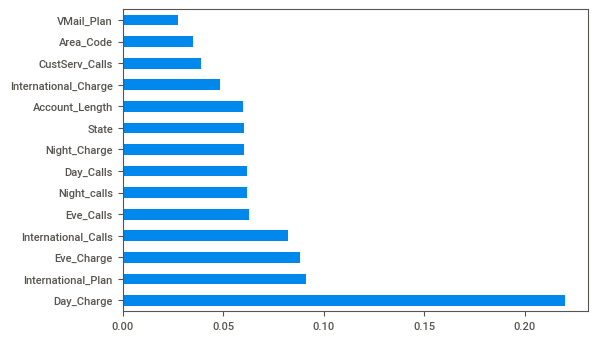

In [247]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

The above plot the day_charmge and international plan, Eve charge Internatinal calls are most importent features compare to others 

# converting  Imbalanced data in to balanced data

In [248]:
# !pip install imblearn

In [249]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy="minority") 
X_sm,y_sm=sm.fit_resample(X,y)

In [250]:
print(X_sm.shape)
print(y_sm.shape)

(6960, 14)
(6960,)


the Churn 'Yes','NO' are imbalanced so we conver them to balanced data and we use smote techinqe

## Train and Test Splite

In [251]:
from sklearn.model_selection import train_test_split

In [315]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=.25,random_state=32) 

In [316]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.fit_transform(X_test)

In [317]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5220, 14)
(1740, 14)
(5220,)
(1740,)


# appling defferent models/algorithems

## Logistic Regression

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [319]:
model_1=LogisticRegression(C=0.1, max_iter=400, random_state=50) #used hypaparameter tuning and get parameters 

In [320]:
model_1.fit(X_train,y_train)
y_train_predict=model_1.predict(X_train)
y_test_predict=model_1.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
print('train accuracy:',accuracy_score(y_train,y_train_predict))
print('test accuracy:',accuracy_score(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))


train accuracy: 0.7814176245210728
test accuracy: 0.7839080459770115
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       889
           1       0.78      0.79      0.78       851

    accuracy                           0.78      1740
   macro avg       0.78      0.78      0.78      1740
weighted avg       0.78      0.78      0.78      1740



In [321]:
pd.crosstab(y_test,y_test_predict)

col_0    0    1
Churn          
0      695  194
1      182  669

In [322]:
y_test_predict[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [323]:
 preds=pd.DataFrame(y_test_predict,columns=['Churn_Flag'])

In [324]:
predictions = model_1.predict_proba(X_test)
predictions[0:5]

array([[0.10273396, 0.89726604],
       [0.48838221, 0.51161779],
       [0.93306243, 0.06693757],
       [0.30980872, 0.69019128],
       [0.59254378, 0.40745622]])

In [325]:
y_test.head(5)

4304    1
2711    0
3329    0
3927    1
5684    1
Name: Churn, dtype: int64

In [326]:
roc_score=roc_auc_score(y_test,y_test_predict)

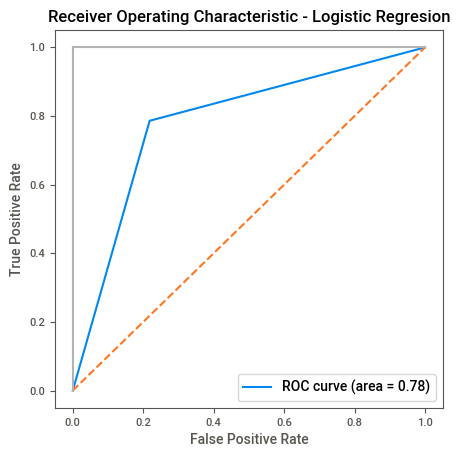

In [327]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_test_predict)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic Regresion')
plt.plot(false_positive_rate1, true_positive_rate1,label="ROC curve (area = %0.2f)" % roc_score)
plt.legend(loc="lower right")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## KNN 

In [328]:
from sklearn.neighbors import KNeighborsClassifier

In [329]:
model_2=KNeighborsClassifier(n_neighbors=2)#n_neighbors=100
model_2.fit(X_train,y_train)

y_predict=model_2.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       889
           1       0.87      0.98      0.92       851

    accuracy                           0.92      1740
   macro avg       0.92      0.92      0.92      1740
weighted avg       0.93      0.92      0.92      1740



In [330]:
pd.crosstab(y_test,y_predict) 

col_0    0    1
Churn          
0      760  129
1       13  838

In [331]:
y_predict[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [332]:
roc_score=roc_auc_score(y_test,y_predict)

In [333]:
predictions = model_2.predict_proba(X_test)
predictions[0:5]

array([[0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ]])

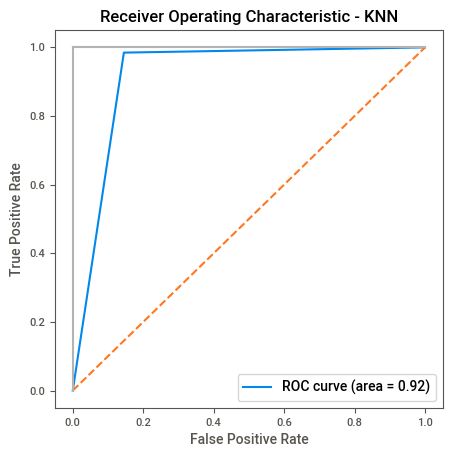

In [334]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_predict)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1,label="ROC curve (area = %0.2f)" % roc_score)
plt.legend(loc="lower right")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM


In [335]:
from sklearn.svm import SVC

In [336]:
model_3=SVC(probability=True)#kernel='rbf',C=2
model_3.fit(X_train,y_train)

y_predict=model_3.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       889
           1       0.71      0.68      0.69       851

    accuracy                           0.71      1740
   macro avg       0.71      0.71      0.71      1740
weighted avg       0.71      0.71      0.71      1740



In [337]:
pd.crosstab(y_test,y_predict) 

col_0    0    1
Churn          
0      659  230
1      276  575

In [338]:
y_predict[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [339]:
predictions = model_3.predict_proba(X_test)
predictions[0:5]

array([[0.44241374, 0.55758626],
       [0.35344402, 0.64655598],
       [0.58144985, 0.41855015],
       [0.36352691, 0.63647309],
       [0.72376225, 0.27623775]])

In [340]:
roc_score=roc_auc_score(y_test,y_predict)

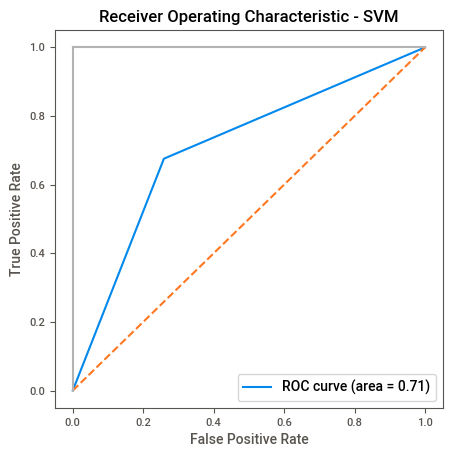

In [341]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_predict)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1,label="ROC curve (area = %0.2f)" % roc_score)
plt.legend(loc="lower right")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## DECISION TREE

In [342]:
from sklearn.tree import DecisionTreeClassifier

In [343]:
model_5=DecisionTreeClassifier(max_depth=32)#max_depth=5
model_5.fit(X_train,y_train)

y_predict=model_5.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       889
           1       0.82      0.87      0.85       851

    accuracy                           0.85      1740
   macro avg       0.85      0.85      0.85      1740
weighted avg       0.85      0.85      0.85      1740



In [344]:
pd.crosstab(y_test,y_predict) 

col_0    0    1
Churn          
0      731  158
1      110  741

In [345]:
y_predict[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [346]:
predictions = model_5.predict_proba(X_test)


In [347]:
roc_score=roc_auc_score(y_test,y_predict)

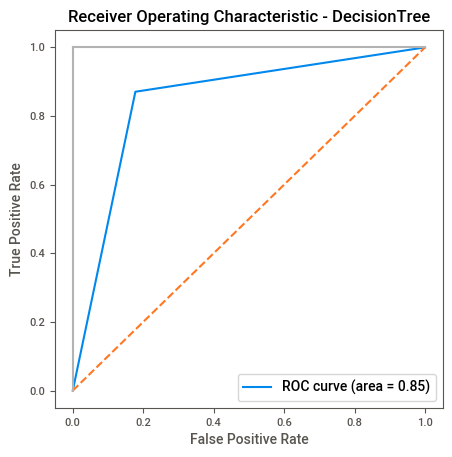

In [348]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_predict)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1,label="ROC curve (area = %0.2f)" % roc_score)
plt.legend(loc="lower right")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XG BOOST 

In [349]:
!pip install xgboost


In [350]:
import xgboost as xgb



In [351]:

model_4=xgb.XGBClassifier(n_estimators=100,max_depth=38)#n_estimators=100,max_depth=38

In [352]:
# model_4=xgb.XGBClassifier(n_estimators=100,max_depth=38)#n_estimators=27,max_depth=10,)
model_4.fit(X_train,y_train)

y_predict=model_4.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       889
           1       0.94      0.94      0.94       851

    accuracy                           0.94      1740
   macro avg       0.94      0.94      0.94      1740
weighted avg       0.94      0.94      0.94      1740



## Goal 2

In [353]:
predictions = model_4.predict_proba(X_test)
for row in predictions[0:10]:
        print('customer churn score is: {:.2f} %'.format(row[1]*100))

customer churn score is: 98.55 %
customer churn score is: 12.72 %
customer churn score is: 0.11 %
customer churn score is: 99.73 %
customer churn score is: 99.18 %
customer churn score is: 0.02 %
customer churn score is: 0.15 %
customer churn score is: 91.13 %
customer churn score is: 99.46 %
customer churn score is: 0.10 %


In [354]:
pd.crosstab(y_test,y_predict) 

col_0    0    1
Churn          
0      840   49
1       50  801

In [294]:
X_test1=X_test.copy()

## Goal 3

In [295]:
X_test_flag=X_test.copy()

In [296]:
X_test_flag = pd.DataFrame(X_test_flag, columns=X.columns)
X_test_flag

State  Account_Length  Area_Code  International_Plan  VMail_Plan  \
3277     11             132          1                   0           0   
4903     32              86          1                   0           0   
4462     17              78          1                   0           0   
6425     43              69          1                   0           0   
608      22             101          2                   0           0   
...     ...             ...        ...                 ...         ...   
3798     12             121          1                   0           0   
2138     47             120          0                   0           1   
1771     27             126          1                   0           0   
1968      4              95          1                   0           0   
1177     46             122          1                   0           0   

      Day_Calls  Day_Charge  Eve_Calls  Eve_Charge  Night_calls  Night_Charge  \
3277        144          23         89          25          126             6   
4903         93          44        113          18           82            13   
4462        116          50         92          17          124             7   
6425        100          38        107          24          101            10   
608          72          32        103          17          111             9   
...         ...         ...        ...         ...          ...           ...   
3798         96          46        106          22           83             9   
2138        123          36         76          24           78             8   
1771         93          17        107          10           66            14   
1968         98          31         95          23          113             4   
1177        115          23        137          20          110             8   

      International_Calls  International_Charge  CustServ_Calls  
3277                    4                     3               2  
4903                    5                     2               1  
4462                    3                     3               1  
6425                    5                     2               0  
608                     8                     2               1  
...                   ...                   ...             ...  
3798                    3                     2               1  
2138                    3                     1               1  
1771                    1                     3               0  
1968                    8                     2               1  
1177                    4                     2               0  

[1740 rows x 14 columns]

In [297]:
X_test_flag['Churn_Flag']=y_predict
X_test_flag.Churn_Flag.replace([0,1],['No','Yes'],inplace=True)

In [298]:
X_test_flag

State  Account_Length  Area_Code  International_Plan  VMail_Plan  \
3277     11             132          1                   0           0   
4903     32              86          1                   0           0   
4462     17              78          1                   0           0   
6425     43              69          1                   0           0   
608      22             101          2                   0           0   
...     ...             ...        ...                 ...         ...   
3798     12             121          1                   0           0   
2138     47             120          0                   0           1   
1771     27             126          1                   0           0   
1968      4              95          1                   0           0   
1177     46             122          1                   0           0   

      Day_Calls  Day_Charge  Eve_Calls  Eve_Charge  Night_calls  Night_Charge  \
3277        144          23         89          25          126             6   
4903         93          44        113          18           82            13   
4462        116          50         92          17          124             7   
6425        100          38        107          24          101            10   
608          72          32        103          17          111             9   
...         ...         ...        ...         ...          ...           ...   
3798         96          46        106          22           83             9   
2138        123          36         76          24           78             8   
1771         93          17        107          10           66            14   
1968         98          31         95          23          113             4   
1177        115          23        137          20          110             8   

      International_Calls  International_Charge  CustServ_Calls Churn_Flag  
3277                    4                     3               2         No  
4903                    5                     2               1        Yes  
4462                    3                     3               1        Yes  
6425                    5                     2               0        Yes  
608                     8                     2               1         No  
...                   ...                   ...             ...        ...  
3798                    3                     2               1        Yes  
2138                    3                     1               1         No  
1771                    1                     3               0         No  
1968                    8                     2               1         No  
1177                    4                     2               0         No  

[1740 rows x 15 columns]

In [299]:
roc_score=roc_auc_score(y_test,y_predict)

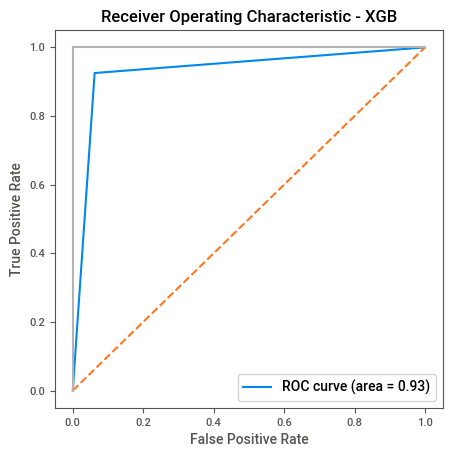

In [300]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_predict)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - XGB')
plt.plot(false_positive_rate1, true_positive_rate1,label="ROC curve (area = %0.2f)" % roc_score)
plt.legend(loc="lower right")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [301]:
X_test

State  Account_Length  Area_Code  International_Plan  VMail_Plan  \
3277     11             132          1                   0           0   
4903     32              86          1                   0           0   
4462     17              78          1                   0           0   
6425     43              69          1                   0           0   
608      22             101          2                   0           0   
...     ...             ...        ...                 ...         ...   
3798     12             121          1                   0           0   
2138     47             120          0                   0           1   
1771     27             126          1                   0           0   
1968      4              95          1                   0           0   
1177     46             122          1                   0           0   

      Day_Calls  Day_Charge  Eve_Calls  Eve_Charge  Night_calls  Night_Charge  \
3277        144          23         89          25          126             6   
4903         93          44        113          18           82            13   
4462        116          50         92          17          124             7   
6425        100          38        107          24          101            10   
608          72          32        103          17          111             9   
...         ...         ...        ...         ...          ...           ...   
3798         96          46        106          22           83             9   
2138        123          36         76          24           78             8   
1771         93          17        107          10           66            14   
1968         98          31         95          23          113             4   
1177        115          23        137          20          110             8   

      International_Calls  International_Charge  CustServ_Calls  
3277                    4                     3               2  
4903                    5                     2               1  
4462                    3                     3               1  
6425                    5                     2               0  
608                     8                     2               1  
...                   ...                   ...             ...  
3798                    3                     2               1  
2138                    3                     1               1  
1771                    1                     3               0  
1968                    8                     2               1  
1177                    4                     2               0  

[1740 rows x 14 columns]

## Random Forest

In [302]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [309]:
model_6=RandomForestClassifier(random_state=43)#random_state=45

In [310]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# #Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# print(random_grid)

In [311]:
# # Use the random grid to search for best hyperparamet
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = model_6, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1,random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train,y_train)

In [312]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [313]:
rf_random.best_score_

0.9011494252873563

In [314]:
model_6.fit(X_train,y_train)

y_predict=model_6.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       870
           1       0.94      0.91      0.92       870

    accuracy                           0.93      1740
   macro avg       0.93      0.93      0.93      1740
weighted avg       0.93      0.93      0.93      1740



In [164]:
print(accuracy_score(y_test,y_predict))

0.9339080459770115


In [165]:
predictions = model_6.predict_proba(X_test)
for row in predictions[0:10]:
    print('customer churn score is: {:.2f} %'.format(row[1]*100))

customer churn score is: 10.00 %
customer churn score is: 97.00 %
customer churn score is: 100.00 %
customer churn score is: 64.00 %
customer churn score is: 19.00 %
customer churn score is: 93.00 %
customer churn score is: 13.00 %
customer churn score is: 9.00 %
customer churn score is: 12.00 %
customer churn score is: 9.00 %


In [166]:
roc_curve(y_test,y_predict)

(array([0.        , 0.06781609, 1.        ]),
 array([0.        , 0.93563218, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [167]:
roc_score=roc_auc_score(y_test,y_predict)

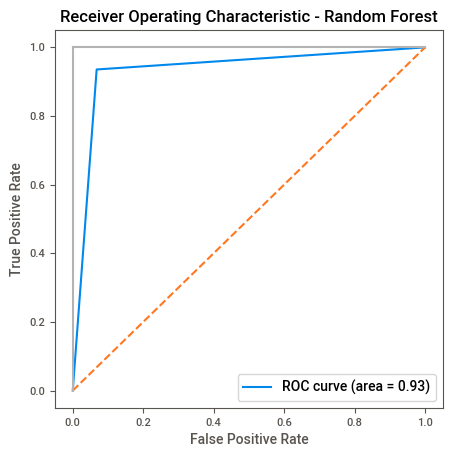

In [168]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_predict)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1,label="ROC curve (area = %0.2f)" % roc_score)
plt.legend(loc="lower right")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c="0.7"), plt.plot([1, 1] , c="0.7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest using scalling 

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1=scaler.fit_transform(X1)

In [170]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy="minority") 
X_sm1,y_sm1=sm.fit_resample(X1,y1)

In [171]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_sm1,y_sm1,test_size=.25,stratify=y_sm1,random_state=32) 

In [172]:
model_6.fit(X_train1,y_train1)

y_predict1=model_6.predict(X_test1)
print(classification_report(y_test1,y_predict1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       870
           1       0.97      0.96      0.97       870

    accuracy                           0.97      1740
   macro avg       0.97      0.97      0.97      1740
weighted avg       0.97      0.97      0.97      1740



In [173]:
print(accuracy_score(y_test1,y_predict1))

0.9683908045977011


In [174]:
predictions = model_4.predict_proba(X_test1)
for row in predictions[0:10]:
    print('customer churn score is: {:.2f} %'.format(row[1]*100))

customer churn score is: 0.12 %
customer churn score is: 0.20 %
customer churn score is: 0.12 %
customer churn score is: 64.15 %
customer churn score is: 0.20 %
customer churn score is: 0.01 %
customer churn score is: 0.12 %
customer churn score is: 0.11 %
customer churn score is: 0.02 %
customer churn score is: 0.02 %


In [175]:
roc_curve(y_test,y_predict)

(array([0.        , 0.06781609, 1.        ]),
 array([0.        , 0.93563218, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [176]:
roc_score1=roc_auc_score(y_test1,y_predict1)

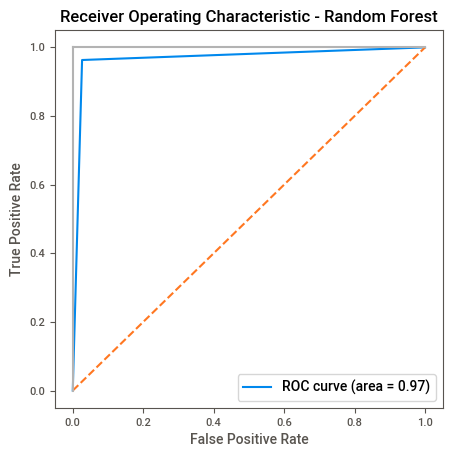

In [177]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test1, y_predict1)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1,label="ROC curve (area = %0.2f)" % roc_score1)
plt.legend(loc="lower right")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c="0.7"), plt.plot([1, 1] , c="0.7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()